***Installation and Imports***

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras for Simple RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input

# Data preprocessing tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducible results
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Setup completed successfully!")


TensorFlow version: 2.19.0
Setup completed successfully!


In [ ]:
!pip install tensorflow


In [ ]:
!pip install tensorflow pandas numpy matplotlib scikit-learn seaborn

**Change Working directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DAM202/Practical_3')
os.listdir()

['weather_data.csv']

# **Data Loading and Exploration**

**Load Bangladesh Weather Data**

In [ ]:
def load_weather_data(file_path):
    """
    Load Bangladesh weather data and create proper structure

    Expected CSV format:
    Year, Day, Wind_Speed, Specific_Humidity, Relative_Humidity, Precipitation, Temperature
    Example: 1990, 240, 3.26, 15.62, 65, 0.69, 30.65
    """

    # Load the CSV file
    df = pd.read_csv('weather_data.csv') #Same working directory

    # Define column names based on your data description
    column_names = [
        'Year', 'Day', 'Wind_Speed', 'Specific_Humidity',
        'Relative_Humidity', 'Precipitation', 'Temperature'
    ]

    # Assign column names if they're not already set
    if len(df.columns) == len(column_names):
        df.columns = column_names

    # Create proper date from Year and Day
    df['Date'] = pd.to_datetime(df['Year'] * 1000 + df['Day'], format='%Y%j')

    # Set date as index for time series analysis
    df.set_index('Date', inplace=True)

    # Remove original Year and Day columns
    df.drop(['Year', 'Day'], axis=1, inplace=True)

    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")

    return df

# Load your data
data_file = "bangladesh_weather_data.csv"  # Replace with your file path
df = load_weather_data(data_file)


Data loaded successfully!
Shape: (12113, 5)
Date range: 1990-01-01 00:00:00 to 2023-03-01 00:00:00


In [ ]:
df.head()

,Wind_Speed,Specific_Humidity,Relative_Humidity,Precipitation,Temperature
Date,,,,,
1990-01-01,1.08,5.68,53.06,0.0,16.33
1990-01-02,1.13,5.92,58.06,0.0,15.68
1990-01-03,1.33,5.68,52.69,0.0,16.56
1990-01-04,1.09,5.19,47.19,0.0,17.09
1990-01-05,0.94,4.82,42.88,0.0,17.26


In [ ]:
#Compare with original dataset
main_df = pd.read_csv('weather_data.csv') #Same working directory
main_df.head()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26


**Data Exploration and Visualization**

=== BANGLADESH WEATHER DATA EXPLORATION ===
Dataset Shape: (12113, 5)
Date Range: 1990-01-01 to 2023-03-01
Total Days: 12113 days
Years Covered: 34 years

=== BASIC STATISTICS ===
       Wind_Speed  Specific_Humidity  Relative_Humidity  Precipitation  \
count    12113.00           12113.00           12113.00       12113.00   
mean         1.31              15.21              74.64           7.18   
std          0.54               5.53              15.29          13.13   
min          0.44               2.62              15.81           0.00   
25%          0.95               9.95              65.25           0.00   
50%          1.15              16.17              79.62           1.16   
75%          1.52              20.57              86.56           9.26   
max          5.34              24.29              96.12         170.63   

       Temperature  
count     12113.00  
mean         25.04  
std           4.37  
min          11.19  
25%          21.43  
50%          26.93  
75%   

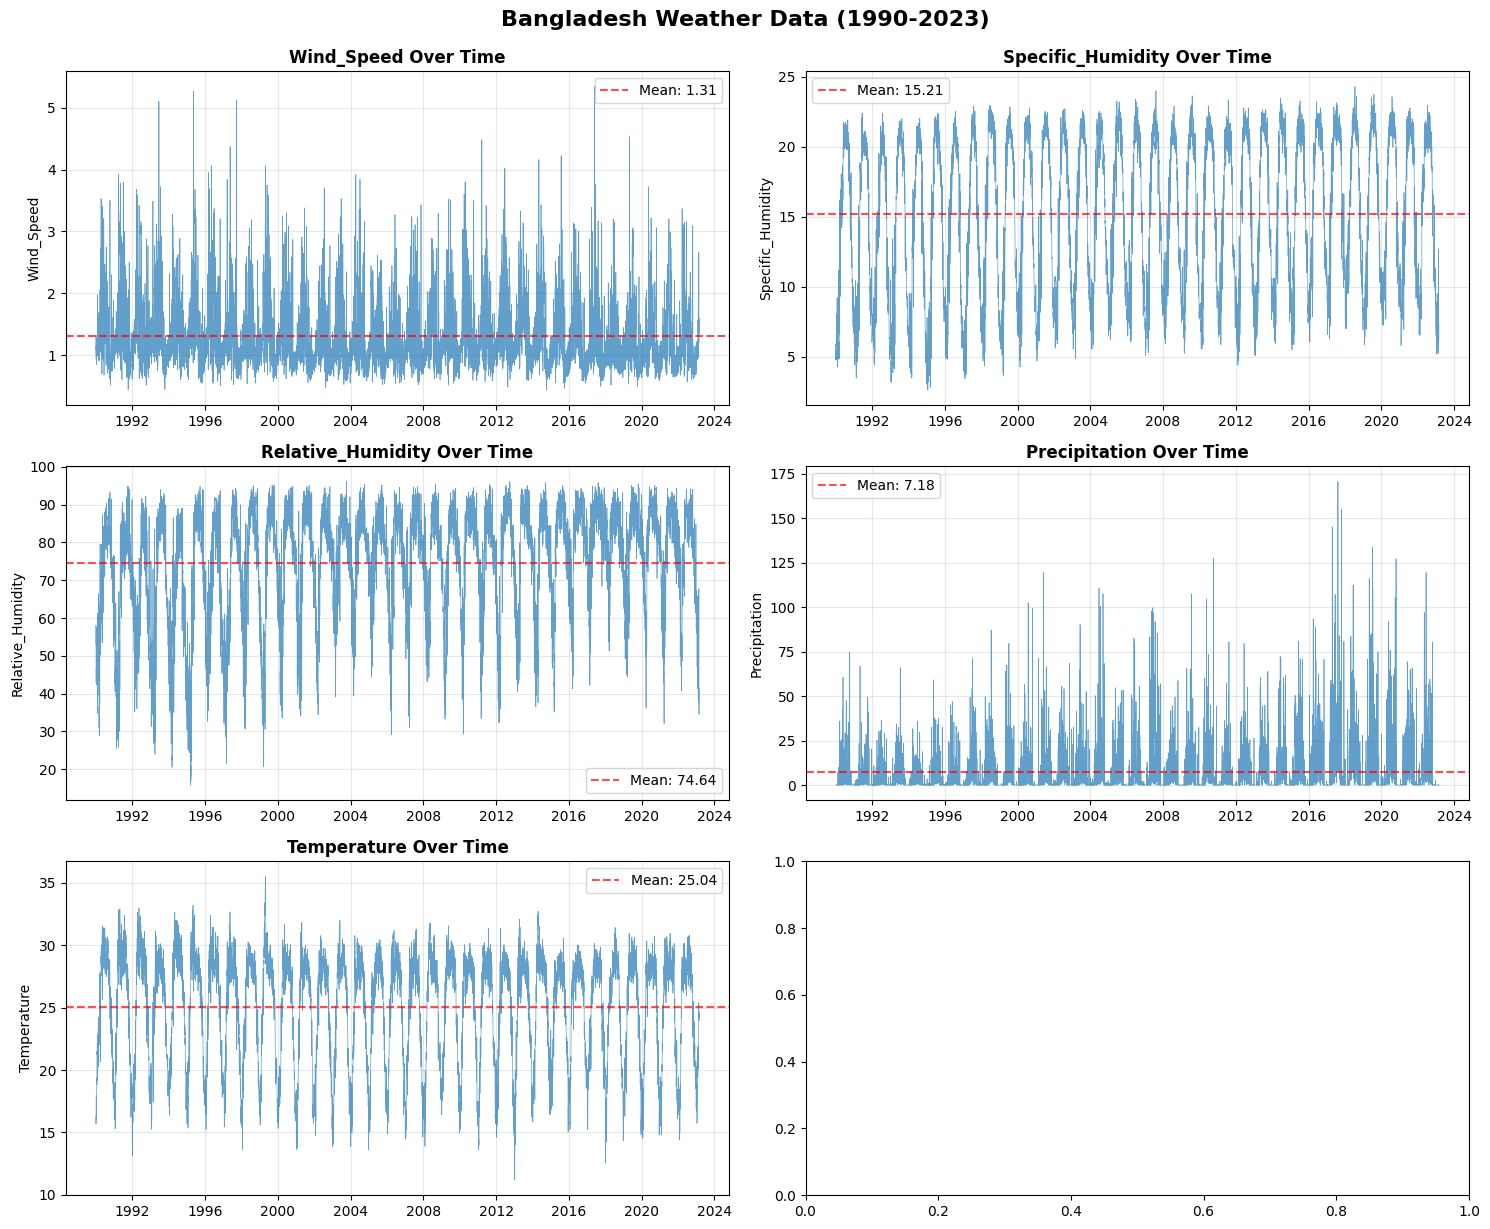

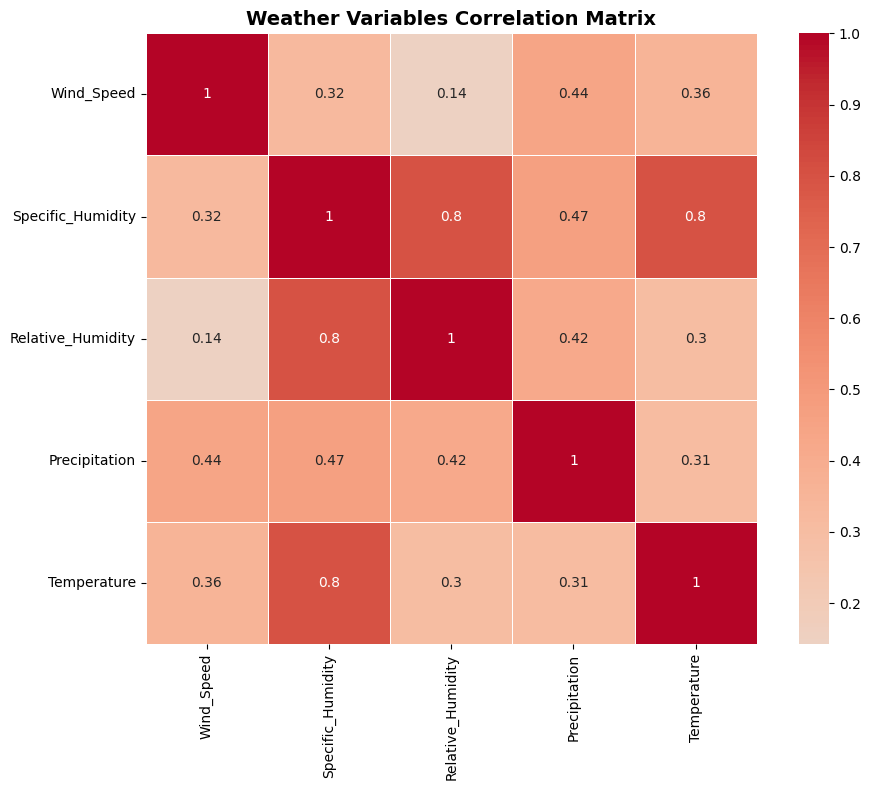

In [ ]:
def explore_weather_data(df):
    """
    Comprehensive exploration of weather data
    """

    print("=== BANGLADESH WEATHER DATA EXPLORATION ===")
    print(f"Dataset Shape: {df.shape}")
    print(f"Date Range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
    print(f"Total Days: {len(df)} days")
    print(f"Years Covered: {df.index.year.nunique()} years")

    # Basic statistics
    print("\n=== BASIC STATISTICS ===")
    print(df.describe().round(2))

    # Check for missing values
    print("\n=== MISSING VALUES ===")
    missing_values = df.isnull().sum()
    print(missing_values)

    # Data types
    print("\n=== DATA TYPES ===")
    print(df.dtypes)

    # Visualize all weather variables
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        axes[i].plot(df.index, df[column], alpha=0.7, linewidth=0.5)
        axes[i].set_title(f'{column} Over Time', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(column)
        axes[i].grid(True, alpha=0.3)

        # Add some statistics to the plot
        mean_val = df[column].mean()
        axes[i].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7,
                       label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

    plt.tight_layout()
    plt.suptitle('Bangladesh Weather Data (1990-2023)', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Weather Variables Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return df

# Explore the data
df_explored = explore_weather_data(df)


# Data Preprocessing for Simple RNN

**Data Cleaning**

In [ ]:
def clean_weather_data(df):
    """
    Clean the weather data for Simple RNN processing
    """

    print("=== DATA CLEANING PROCESS ===")

    # Make a copy to avoid modifying original data
    df_clean = df.copy()

    # 1. Handle missing values
    print(f"Missing values before cleaning: {df_clean.isnull().sum().sum()}")

    # Forward fill then backward fill for time series data
    df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')

    print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

    # 2. Remove outliers using IQR method
    print("\n=== OUTLIER REMOVAL ===")

    for column in df_clean.columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers_before = ((df_clean[column] < lower_bound) |
                          (df_clean[column] > upper_bound)).sum()

        # Remove outliers by clipping
        df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)

        print(f"{column}: {outliers_before} outliers handled")

    # 3. Basic feature engineering for time series
    df_clean['Month'] = df_clean.index.month
    df_clean['Day_of_Year'] = df_clean.index.dayofyear

    # Add simple moving averages (helpful for Simple RNN)
    df_clean['Temp_MA_3'] = df_clean['Temperature'].rolling(window=3).mean()
    df_clean['Temp_MA_7'] = df_clean['Temperature'].rolling(window=7).mean()

    # Remove rows with NaN values created by moving averages
    df_clean.dropna(inplace=True)

    print(f"\nFinal dataset shape: {df_clean.shape}")

    return df_clean

# Clean the data
df_clean = clean_weather_data(df_explored)

=== DATA CLEANING PROCESS ===
Missing values before cleaning: 0
Missing values after cleaning: 0

=== OUTLIER REMOVAL ===
Wind_Speed: 661 outliers handled
Specific_Humidity: 0 outliers handled
Relative_Humidity: 152 outliers handled
Precipitation: 1089 outliers handled
Temperature: 0 outliers handled

Final dataset shape: (12107, 9)


/tmp/ipython-input-601555160.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')


In [ ]:
df_clean.head()

,Wind_Speed,Specific_Humidity,Relative_Humidity,Precipitation,Temperature,Month,Day_of_Year,Temp_MA_3,Temp_MA_7
Date,,,,,,,,,
1990-01-07,1.04,5.49,46.81,0.0,17.98,1,7,17.510000,16.884286
1990-01-08,1.06,5.07,44.25,0.0,17.58,1,8,17.616667,17.062857
1990-01-09,0.85,4.82,42.31,0.0,17.25,1,9,17.603333,17.287143
1990-01-10,1.14,4.76,45.38,0.0,16.33,1,10,17.053333,17.254286
1990-01-11,1.07,5.07,48.44,0.0,16.15,1,11,16.576667,17.120000


**Data Normalization (Critical for Simple RNN)**

In [ ]:
def normalize_data_for_rnn(df, target_column='Temperature'):
    """
    Normalize data for Simple RNN training

    Important: We fit the scaler only on training data to prevent data leakage
    """

    print(f"=== DATA NORMALIZATION FOR SIMPLE RNN ===")
    print(f"Target variable: {target_column}")

    # Separate features and target
    feature_columns = [col for col in df.columns if col != target_column]

    print(f"Feature columns: {feature_columns}")
    print(f"Number of features: {len(feature_columns)}")

    # Initialize scalers
    feature_scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaler = MinMaxScaler(feature_range=(0, 1))

    return df, feature_columns, feature_scaler, target_scaler

# Prepare for normalization
df_processed, feature_columns, feature_scaler, target_scaler = normalize_data_for_rnn(df_clean)

=== DATA NORMALIZATION FOR SIMPLE RNN ===
Target variable: Temperature
Feature columns: ['Wind_Speed', 'Specific_Humidity', 'Relative_Humidity', 'Precipitation', 'Month', 'Day_of_Year', 'Temp_MA_3', 'Temp_MA_7']
Number of features: 8


In [ ]:
df_processed.head(2)

,Wind_Speed,Specific_Humidity,Relative_Humidity,Precipitation,Temperature,Month,Day_of_Year,Temp_MA_3,Temp_MA_7
Date,,,,,,,,,
1990-01-07,1.04,5.49,46.81,0.0,17.98,1,7,17.510000,16.884286
1990-01-08,1.06,5.07,44.25,0.0,17.58,1,8,17.616667,17.062857


**Time Series Train-Test Split**

In [ ]:
def create_time_series_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Create time-aware train/validation/test split for time series

    Important: No shuffling to maintain temporal order!
    """

    print(f"=== TIME SERIES DATA SPLITTING ===")

    n_samples = len(df)

    # Calculate split indices
    train_end = int(n_samples * train_ratio)
    val_end = int(n_samples * (train_ratio + val_ratio))

    # Split data maintaining temporal order
    train_data = df.iloc[:train_end].copy()
    val_data = df.iloc[train_end:val_end].copy()
    test_data = df.iloc[val_end:].copy()

    print(f"Training data: {len(train_data)} samples ({train_data.index.min()} to {train_data.index.max()})")
    print(f"Validation data: {len(val_data)} samples ({val_data.index.min()} to {val_data.index.max()})")
    print(f"Test data: {len(test_data)} samples ({test_data.index.min()} to {test_data.index.max()})")

    return train_data, val_data, test_data

# Split the data
train_data, val_data, test_data = create_time_series_split(df_processed)

=== TIME SERIES DATA SPLITTING ===
Training data: 8474 samples (1990-01-07 00:00:00 to 2013-03-20 00:00:00)
Validation data: 1816 samples (2013-03-21 00:00:00 to 2018-03-10 00:00:00)
Test data: 1817 samples (2018-03-11 00:00:00 to 2023-03-01 00:00:00)


In [ ]:
train_data.head(2)

,Wind_Speed,Specific_Humidity,Relative_Humidity,Precipitation,Temperature,Month,Day_of_Year,Temp_MA_3,Temp_MA_7
Date,,,,,,,,,
1990-01-07,1.04,5.49,46.81,0.0,17.98,1,7,17.510000,16.884286
1990-01-08,1.06,5.07,44.25,0.0,17.58,1,8,17.616667,17.062857


# Creating Sequences for Simple RNN

**Understanding Sequence Creation**

In [ ]:
def create_sequences_for_simple_rnn(features, target, sequence_length=5):
    """
    Create sequences for Simple RNN training

    For Simple RNN, we use shorter sequences (5-7 days) for better performance

    Parameters:
    - data: scaled data array
    - target_column: index of target column
    - sequence_length: number of time steps to look back (keep it short for Simple RNN)
    """

    sequences = []
    targets = []

    # Create sequences
    for i in range(sequence_length, len(features)):
        # Get sequence of past 'sequence_length' days
        sequences.append(features[i-sequence_length:i])  # Shape: (sequence_length, features)

        # Get target (next day's temperature)
        targets.append(target[i])  # Single value

    return np.array(sequences), np.array(targets)

In [ ]:
def prepare_data_for_simple_rnn(train_data, val_data, test_data,
                               feature_columns, target_column,
                               feature_scaler, target_scaler,
                               sequence_length=5):
    """
    Complete data preparation pipeline for Simple RNN
    """

    print(f"=== PREPARING DATA FOR SIMPLE RNN ===")
    print(f"Sequence length: {sequence_length} days")
    print(f"Target: {target_column}")
    print(f"Features: {feature_columns}")

    # 1. Scale the data (fit only on training data!)
    train_features_scaled = feature_scaler.fit_transform(train_data[feature_columns])
    train_target_scaled = target_scaler.fit_transform(train_data[[target_column]])
    print(f"Train Target : {train_target_scaled.flatten().shape}")

    val_features_scaled = feature_scaler.transform(val_data[feature_columns])
    val_target_scaled = target_scaler.transform(val_data[[target_column]])

    test_features_scaled = feature_scaler.transform(test_data[feature_columns])
    test_target_scaled = target_scaler.transform(test_data[[target_column]])

    # 2. Combine features and target for sequence creation
    train_combined = np.column_stack([train_features_scaled, train_target_scaled])
    val_combined = np.column_stack([val_features_scaled, val_target_scaled])
    test_combined = np.column_stack([test_features_scaled, test_target_scaled])

    # 3. Find target column index in combined array
    #target_idx = train_data.columns.get_loc('Temperature')

    # 4. Create sequences
    X_train, y_train = create_sequences_for_simple_rnn(train_features_scaled, train_target_scaled.flatten(), sequence_length)
    X_val, y_val = create_sequences_for_simple_rnn(val_features_scaled, val_target_scaled.flatten(), sequence_length)
    X_test, y_test = create_sequences_for_simple_rnn(test_features_scaled, test_target_scaled.flatten(), sequence_length)


    print(f"Training sequences: {X_train.shape}")
    print(f"Training targets: {y_train.shape}")
    print(f"Validation sequences: {X_val.shape}")
    print(f"Test sequences: {X_test.shape}")

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# Prepare sequences (using short sequence length for Simple RNN)
SEQUENCE_LENGTH = 5  # Only 5 days - optimal for Simple RNN

(X_train, y_train), (X_val, y_val), (X_test, y_test) = prepare_data_for_simple_rnn(
    train_data, val_data, test_data,
    feature_columns, 'Temperature',
    feature_scaler, target_scaler,
    sequence_length=SEQUENCE_LENGTH
)

print("Data preparation completed successfully!")

=== PREPARING DATA FOR SIMPLE RNN ===
Sequence length: 5 days
Target: Temperature
Features: ['Wind_Speed', 'Specific_Humidity', 'Relative_Humidity', 'Precipitation', 'Month', 'Day_of_Year', 'Temp_MA_3', 'Temp_MA_7']
Train Target : (8474,)
Training sequences: (8469, 5, 8)
Training targets: (8469,)
Validation sequences: (1811, 5, 8)
Test sequences: (1812, 5, 8)
Data preparation completed successfully!


In [ ]:
X_train[100]

array([[0.53506494, 0.59709874, 0.48388637, 0.04406048, 0.27272727,
        0.29041096, 0.74475574, 0.72374025],
       [1.        , 0.60832943, 0.50473462, 0.15809935, 0.27272727,
        0.29315068, 0.74292552, 0.73180001],
       [1.        , 0.59709874, 0.49980107, 0.21900648, 0.27272727,
        0.29589041, 0.73363368, 0.7322587 ],
       [1.        , 0.68834815, 0.65401448, 0.81382289, 0.27272727,
        0.29863014, 0.71913276, 0.72564052],
       [1.        , 0.72297613, 0.73645261, 1.        , 0.27272727,
        0.30136986, 0.69815571, 0.71993972]])

# Building Simple RNN Model

**Understanding Simple RNN Architecture**

In [ ]:
def create_simple_rnn_model(input_shape, hidden_units=32, dropout_rate=0.2):
    """
    Create a Simple RNN model optimized for weather prediction

    Architecture:
    1. SimpleRNN layer with specified hidden units
    2. Dropout for regularization
    3. Dense layer for final prediction

    Parameters:
    - input_shape: (sequence_length, number_of_features)
    - hidden_units: number of neurons in RNN layer
    - dropout_rate: dropout rate for regularization
    """

    print(f"=== BUILDING SIMPLE RNN MODEL ===")
    print(f"Input shape: {input_shape}")
    print(f"Hidden units: {hidden_units}")
    print(f"Dropout rate: {dropout_rate}")

    model = Sequential(name="Simple_RNN_Weather_Predictor")

    # Add Input layer to specify input shape
    model.add(Input(shape=input_shape, name='Input_Layer'))

    # Add SimpleRNN layer without input_shape argument
    model.add(SimpleRNN(
        units=hidden_units,
        activation='tanh',  # Default activation
        dropout=dropout_rate,
        recurrent_dropout=dropout_rate,
        name='SimpleRNN_Layer'
    ))


    # Add dropout for additional regularization
    model.add(Dropout(dropout_rate, name='Dropout_Layer'))

    # Add dense layer for final prediction
    model.add(Dense(
        units=1,
        activation='linear',  # Linear activation for regression
        name='Output_Layer'
    ))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)

    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_absolute_percentage_error']
    )

    # Display model summary
    print("\n=== MODEL ARCHITECTURE ===")
    model.summary()

    return model

# Create the Simple RNN model
input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, features)
model = create_simple_rnn_model(input_shape, hidden_units=32, dropout_rate=0.2)

=== BUILDING SIMPLE RNN MODEL ===
Input shape: (5, 8)
Hidden units: 32
Dropout rate: 0.2

=== MODEL ARCHITECTURE ===


Model: "Simple_RNN_Weather_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SimpleRNN_Layer (SimpleRNN)     │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training Strategy

In [ ]:
def train_simple_rnn_model(model, X_train, y_train, X_val, y_val,
                          epochs=100, batch_size=32, patience=10):
    """
    Train Simple RNN model with proper callbacks

    Simple RNN training considerations:
    - Lower epochs (50) due to faster convergence
    - Early stopping to prevent overfitting
    - Learning rate reduction for better convergence
    """

    print(f"=== TRAINING SIMPLE RNN MODEL ===")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Epochs: {epochs}")
    print(f"Batch size: {batch_size}")

    # Define callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True,
            verbose=1,
            min_delta=0.001
        ),
        ModelCheckpoint(
            'best_simple_rnn_model.h5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train the model
    print("\nStarting training...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1,
        shuffle=False  # Important: Don't shuffle time series data
    )

    print("Training completed!")
    return history

# Train the model
training_history = train_simple_rnn_model(
    model, X_train, y_train, X_val, y_val,
    epochs=100, batch_size=32, patience=10
)


=== TRAINING SIMPLE RNN MODEL ===
Training samples: 8469
Validation samples: 1811
Epochs: 100
Batch size: 32

Starting training...
Epoch 1/100
256/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 19.1949
Epoch 1: val_loss improved from inf to 0.00401, saving model to best_simple_rnn_model.h5


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 656.8482 - val_loss: 0.0040 - val_mean_absolute_error: 0.0454 - val_mean_absolute_percentage_error: 10.8709
Epoch 2/100
263/265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 121.1877
Epoch 2: val_loss improved from 0.00401 to 0.00389, saving model to best_simple_rnn_model.h5


265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 422.6763 - val_loss: 0.0039 - val_mean_absolute_error: 0.0452 - val_mean_absolute_percentage_error: 10.7243
Epoch 3/100
251/265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 18.2930
Epoch 3: val_loss did not improve from 0.00389
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 364.1787 - val_loss: 0.0041 - val_mean_absolute_error: 0.0476 - val_mean_absolute_percentage_error: 10.8983
Epoch 4/100
263/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 115.5742
Epoch 4: val_loss improved from 0.00389 to 0.00387, saving model to best_simple_rnn_model.h5


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 402.5215 - val_loss: 0.0039 - val_mean_absolute_error: 0.0466 - val_mean_absolute_percentage_error: 10.5209
Epoch 5/100
250/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 16.9300
Epoch 5: val_loss improved from 0.00387 to 0.00381, saving model to best_simple_rnn_model.h5


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 351.7150 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_mean_absolute_percentage_error: 10.4280
Epoch 6/100
254/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 16.6346
Epoch 6: val_loss improved from 0.00381 to 0.00369, saving model to best_simple_rnn_model.h5


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 539.9789 - val_loss: 0.0037 - val_mean_absolute_error: 0.0459 - val_mean_absolute_percentage_error: 10.1734
Epoch 7/100
253/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 16.6004
Epoch 7: val_loss did not improve from 0.00369
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 424.3873 - val_loss: 0.0040 - val_mean_absolute_error: 0.0500 - val_mean_absolute_percentage_error: 10.6295
Epoch 8/100
261/265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 16.1106
Epoch 8: val_loss did not improve from 0.00369
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 469.0494 - val_loss: 0.0040 - val_mean_absolute_er

# Model Evaluation and Visualization

**Training History Visualization**

=== TRAINING HISTORY VISUALIZATION ===


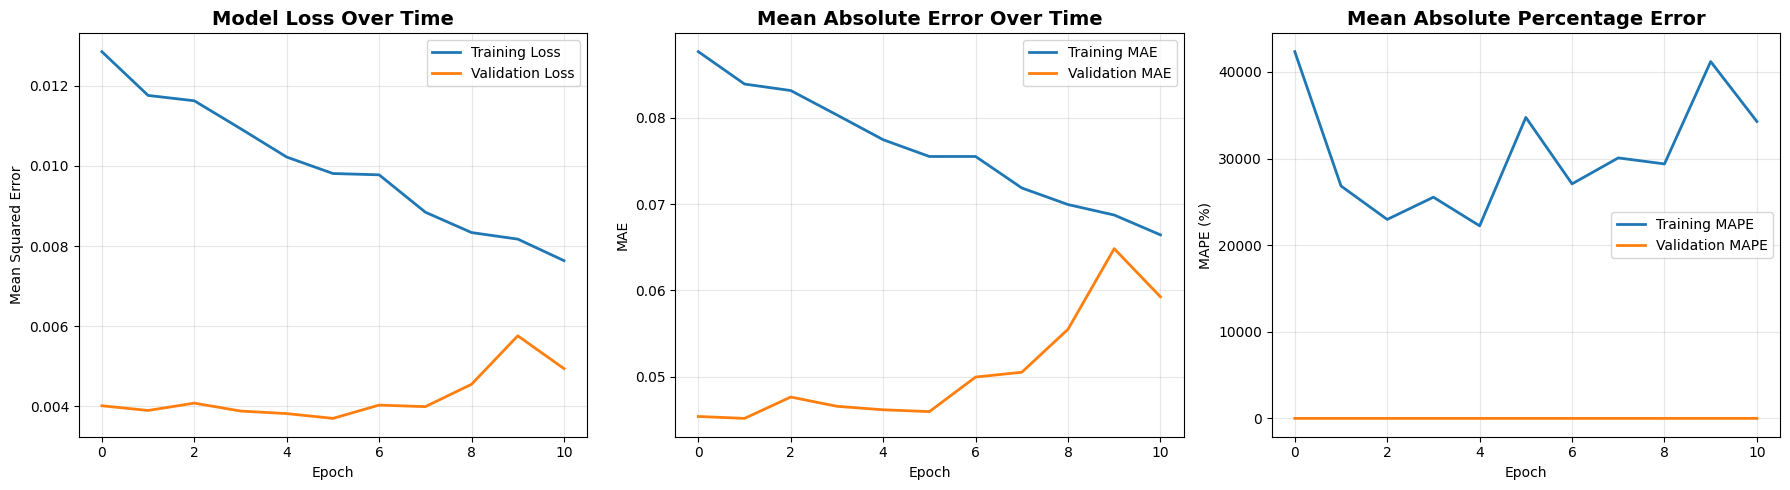

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Visualize training history for Simple RNN
    """

    print("=== TRAINING HISTORY VISUALIZATION ===")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Loss plot
    axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Mean Squared Error')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # MAE plot
    axes[1].plot(history.history['mean_absolute_error'], label='Training MAE', linewidth=2)
    axes[1].plot(history.history['val_mean_absolute_error'], label='Validation MAE', linewidth=2)
    axes[1].set_title('Mean Absolute Error Over Time', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # MAPE plot
    axes[2].plot(history.history['mean_absolute_percentage_error'],
                label='Training MAPE', linewidth=2)
    axes[2].plot(history.history['val_mean_absolute_percentage_error'],
                label='Validation MAPE', linewidth=2)
    axes[2].set_title('Mean Absolute Percentage Error', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('MAPE (%)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(training_history)

**Model Performance Evaluation**

In [ ]:
def evaluate_simple_rnn_performance(model, X_test, y_test, target_scaler):
    """
    Comprehensive evaluation of Simple RNN performance
    """

    print("=== SIMPLE RNN MODEL EVALUATION ===")

    # Make predictions
    y_pred_scaled = model.predict(X_test, verbose=0)

    # Inverse transform to original scale
    y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_original = target_scaler.inverse_transform(y_pred_scaled).flatten()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    r2 = r2_score(y_test_original, y_pred_original)

    # Calculate MAPE manually
    mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    # Temperature-specific accuracy (within certain degrees)
    accuracy_1deg = np.mean(np.abs(y_test_original - y_pred_original) <= 1.0) * 100
    accuracy_2deg = np.mean(np.abs(y_test_original - y_pred_original) <= 2.0) * 100
    accuracy_3deg = np.mean(np.abs(y_test_original - y_pred_original) <= 3.0) * 100

    # Print results
    print("\n🌤️  SIMPLE RNN WEATHER PREDICTION RESULTS 🌤️")
    print("=" * 55)
    print(f"📊 Mean Squared Error (MSE):      {mse:.4f}")
    print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}°C")
    print(f"📊 Mean Absolute Error (MAE):     {mae:.4f}°C")
    print(f"📊 R-squared Score (R²):          {r2:.4f}")
    print(f"📊 Mean Absolute Percentage Error: {mape:.2f}%")
    print("=" * 55)
    print("🎯 TEMPERATURE PREDICTION ACCURACY:")
    print(f"   Within ±1°C: {accuracy_1deg:.1f}% of predictions")
    print(f"   Within ±2°C: {accuracy_2deg:.1f}% of predictions")
    print(f"   Within ±3°C: {accuracy_3deg:.1f}% of predictions")
    print("=" * 55)

    return {
        'y_true': y_test_original,
        'y_pred': y_pred_original,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape,
        'accuracy_1deg': accuracy_1deg,
        'accuracy_2deg': accuracy_2deg,
        'accuracy_3deg': accuracy_3deg
    }

# Evaluate the model
evaluation_results = evaluate_simple_rnn_performance(model, X_test, y_test, target_scaler)

=== SIMPLE RNN MODEL EVALUATION ===

🌤️  SIMPLE RNN WEATHER PREDICTION RESULTS 🌤️
📊 Mean Squared Error (MSE):      2.5397
📊 Root Mean Squared Error (RMSE): 1.5937°C
📊 Mean Absolute Error (MAE):     1.1767°C
📊 R-squared Score (R²):          0.8641
📊 Mean Absolute Percentage Error: 5.31%
🎯 TEMPERATURE PREDICTION ACCURACY:
   Within ±1°C: 55.2% of predictions
   Within ±2°C: 82.3% of predictions
   Within ±3°C: 93.9% of predictions


**Prediction Visualization**

=== PREDICTION VISUALIZATION ===


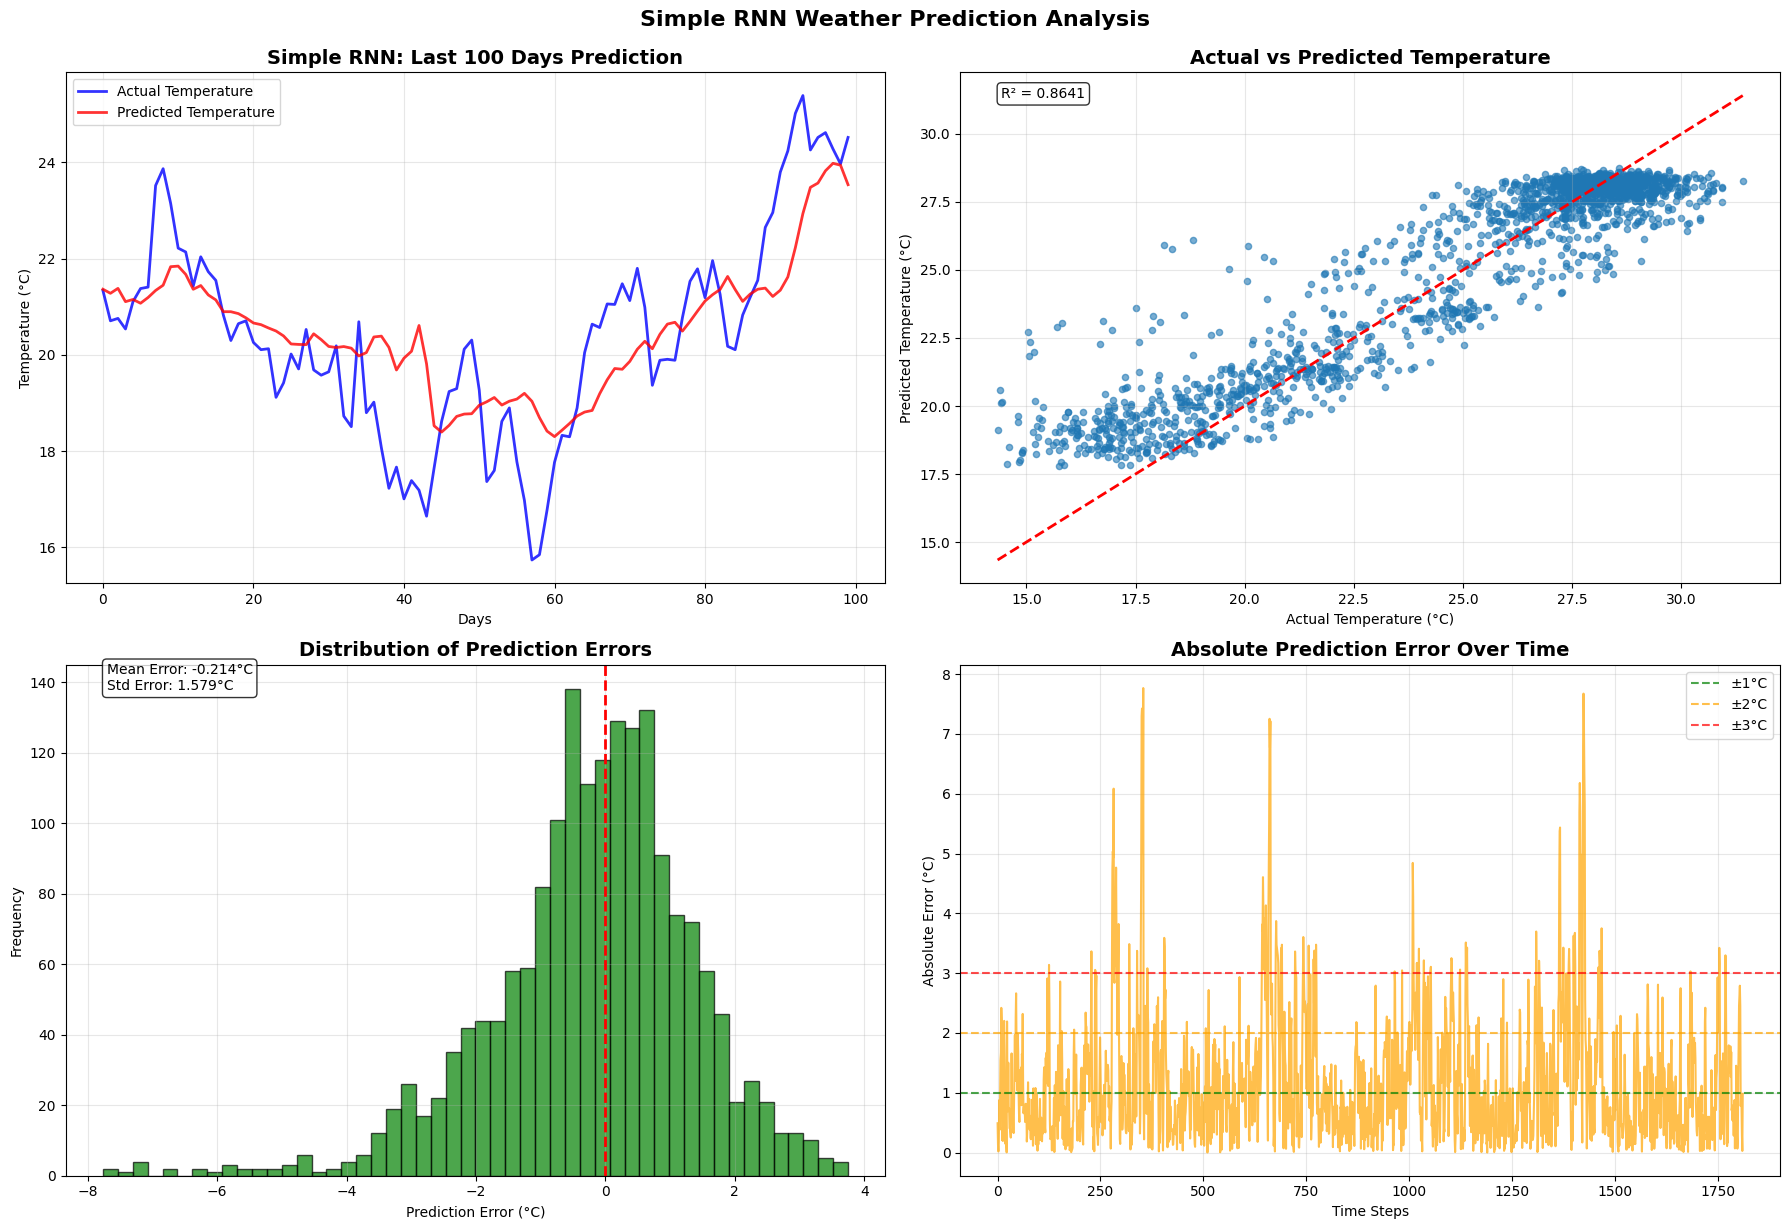

In [ ]:
def visualize_predictions(results, days_to_show=100):
    """
    Create comprehensive visualizations of Simple RNN predictions
    """

    print(f"=== PREDICTION VISUALIZATION ===")

    y_true = results['y_true']
    y_pred = results['y_pred']

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # 1. Time series plot (last N days)
    axes[0, 0].plot(y_true[-days_to_show:], label='Actual Temperature',
                   linewidth=2, alpha=0.8, color='blue')
    axes[0, 0].plot(y_pred[-days_to_show:], label='Predicted Temperature',
                   linewidth=2, alpha=0.8, color='red')
    axes[0, 0].set_title(f'Simple RNN: Last {days_to_show} Days Prediction',
                        fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Days')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Scatter plot: Actual vs Predicted
    axes[0, 1].scatter(y_true, y_pred, alpha=0.6, s=20)
    min_temp, max_temp = y_true.min(), y_true.max()
    axes[0, 1].plot([min_temp, max_temp], [min_temp, max_temp], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual Temperature (°C)')
    axes[0, 1].set_ylabel('Predicted Temperature (°C)')
    axes[0, 1].set_title('Actual vs Predicted Temperature', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # Add R² to scatter plot
    r2 = results['r2']
    axes[0, 1].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[0, 1].transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 3. Error distribution
    errors = y_true - y_pred
    axes[1, 0].hist(errors, bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
    axes[1, 0].set_xlabel('Prediction Error (°C)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # Add error statistics
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    axes[1, 0].text(0.05, 0.95, f'Mean Error: {mean_error:.3f}°C\nStd Error: {std_error:.3f}°C',
                   transform=axes[1, 0].transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 4. Error over time
    axes[1, 1].plot(np.abs(errors), alpha=0.7, color='orange')
    axes[1, 1].set_xlabel('Time Steps')
    axes[1, 1].set_ylabel('Absolute Error (°C)')
    axes[1, 1].set_title('Absolute Prediction Error Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    # Add horizontal lines for accuracy thresholds
    axes[1, 1].axhline(1, color='green', linestyle='--', alpha=0.7, label='±1°C')
    axes[1, 1].axhline(2, color='orange', linestyle='--', alpha=0.7, label='±2°C')
    axes[1, 1].axhline(3, color='red', linestyle='--', alpha=0.7, label='±3°C')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.suptitle('Simple RNN Weather Prediction Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Visualize predictions
visualize_predictions(evaluation_results, days_to_show=100)


**Real-time Prediction Function**

In [ ]:
def make_weather_prediction(model, recent_data, feature_scaler, target_scaler,
                           feature_columns, sequence_length=5):
    """
    Make a weather prediction using the trained Simple RNN model

    Parameters:
    - model: trained Simple RNN model
    - recent_data: pandas DataFrame with recent weather data (last 'sequence_length' days)
    - feature_scaler: fitted feature scaler
    - target_scaler: fitted target scaler
    - feature_columns: list of feature column names
    - sequence_length: number of days to use for prediction
    """

    print(f"=== MAKING NEW WEATHER PREDICTION ===")

    if len(recent_data) < sequence_length:
        raise ValueError(f"Need at least {sequence_length} days of recent data")

    # Get the last sequence_length days
    recent_sequence = recent_data[feature_columns].iloc[-sequence_length-1:-1].values

    # Scale the data
    #recent_sequence_scaled = feature_scaler.transform(recent_sequence)

    #Convert recent_sequence (numpy array) back to DataFrame with columns for scaler
    recent_sequence_df = pd.DataFrame(recent_sequence, columns=feature_columns)
    print(recent_sequence_df)


    # Now transform with feature scaler (which expects column names)
    recent_sequence_scaled = feature_scaler.transform(recent_sequence_df)

    # Reshape for model input: (1, sequence_length, features)
    input_sequence = recent_sequence_scaled.reshape(1, sequence_length, -1)

    # Make prediction (scaled)
    prediction_scaled = model.predict(input_sequence, verbose=0)

    # Inverse transform to get actual temperature
    predicted_temp = target_scaler.inverse_transform(prediction_scaled)[0, 0]

    print(f"🌡️  Predicted temperature for tomorrow: {predicted_temp:.2f}°C")

    return predicted_temp

# Example: Make prediction using last 5 days of test data
sample_recent_data = test_data.iloc[-10:]  # Last 10 days as example
prediction = make_weather_prediction(
    model, sample_recent_data, feature_scaler, target_scaler,
    feature_columns, sequence_length=SEQUENCE_LENGTH
)


=== MAKING NEW WEATHER PREDICTION ===
   Wind_Speed  Specific_Humidity  Relative_Humidity  Precipitation  Month  \
0        1.20              12.15              67.75           0.37    2.0   
1        1.28               8.85              50.44           0.00    2.0   
2        1.41               6.59              38.06           0.00    2.0   
3        1.60               6.04              34.56           0.00    2.0   
4        1.49               6.65              38.94           0.00    2.0   

   Day_of_Year  Temp_MA_3  Temp_MA_7  
0         55.0  24.890000  24.045714  
1         56.0  24.723333  24.312857  
2         57.0  24.466667  24.550000  
3         58.0  24.473333  24.618571  
4         59.0  24.290000  24.580000  
🌡️  Predicted temperature for tomorrow: 23.54°C


In [ ]:
df_clean.tail(5)

,Wind_Speed,Specific_Humidity,Relative_Humidity,Precipitation,Temperature,Month,Day_of_Year,Temp_MA_3,Temp_MA_7
Date,,,,,,,,,
2023-02-25,1.28,8.85,50.44,0.0,24.52,2,56,24.723333,24.312857
2023-02-26,1.41,6.59,38.06,0.0,24.62,2,57,24.466667,24.550000
2023-02-27,1.60,6.04,34.56,0.0,24.28,2,58,24.473333,24.618571
2023-02-28,1.49,6.65,38.94,0.0,23.97,2,59,24.290000,24.580000
2023-03-01,1.36,7.39,41.38,0.0,24.52,3,60,24.256667,24.508571


In [ ]:
print(f"Actual Temperture value of last data: {df_clean.tail(5)['Temperature'].values[-1]}")

Actual Temperture value of last data: 24.52


**Understanding Simple RNN Limitations**

In [ ]:
def analyze_simple_rnn_limitations():
    """
    Educational analysis of Simple RNN limitations for students
    """

    print("=== UNDERSTANDING SIMPLE RNN LIMITATIONS ===")
    print("\n🧠 WHY SIMPLE RNN HAS LIMITATIONS:")
    print("=" * 50)

    print("1. 📉 VANISHING GRADIENT PROBLEM:")
    print("   - Gradients become very small as they propagate back through time")
    print("   - Model struggles to learn from events more than 5-10 time steps ago")
    print("   - Weather patterns often require longer memory (weeks/months)")

    print("\n2. 🔄 SHORT-TERM MEMORY:")
    print("   - Simple RNN forgets information from distant past quickly")
    print("   - Weather has seasonal patterns that need long-term memory")
    print("   - Best performance with 3-7 day sequences")

    print("\n3. 🎯 PERFORMANCE COMPARISON:")
    print("   - Simple RNN: Good for short-term patterns")
    print("   - LSTM/GRU: Better for long-term dependencies")
    print("   - Complex weather patterns need advanced models")

    print("\n💡 WHEN TO USE SIMPLE RNN:")
    print("   ✅ Learning RNN fundamentals")
    print("   ✅ Short-term predictions (1-3 days)")
    print("   ✅ Simple patterns and trends")
    print("   ✅ Computational resource constraints")
    print("   ✅ Proof of concept projects")

    print("\n🚀 NEXT STEPS FOR STUDENTS:")
    print("   1. Master Simple RNN concepts")
    print("   2. Learn LSTM architecture")
    print("   3. Compare performance differences")
    print("   4. Understand when to use each model")
    print("=" * 50)

# Run the educational analysis
analyze_simple_rnn_limitations()

=== UNDERSTANDING SIMPLE RNN LIMITATIONS ===

🧠 WHY SIMPLE RNN HAS LIMITATIONS:
1. 📉 VANISHING GRADIENT PROBLEM:
   - Gradients become very small as they propagate back through time
   - Model struggles to learn from events more than 5-10 time steps ago
   - Weather patterns often require longer memory (weeks/months)

2. 🔄 SHORT-TERM MEMORY:
   - Simple RNN forgets information from distant past quickly
   - Weather has seasonal patterns that need long-term memory
   - Best performance with 3-7 day sequences

3. 🎯 PERFORMANCE COMPARISON:
   - Simple RNN: Good for short-term patterns
   - LSTM/GRU: Better for long-term dependencies
   - Complex weather patterns need advanced models

💡 WHEN TO USE SIMPLE RNN:
   ✅ Learning RNN fundamentals
   ✅ Short-term predictions (1-3 days)
   ✅ Simple patterns and trends
   ✅ Computational resource constraints
   ✅ Proof of concept projects

🚀 NEXT STEPS FOR STUDENTS:
   1. Master Simple RNN concepts
   2. Learn LSTM architecture
   3. Compare perfor

# **Exercises**

In [ ]:
def student_exercises():
    """
    Hands-on exercises for students to reinforce learning
    """

    print("📚 STUDENT EXERCISES - SIMPLE RNN WEATHER PREDICTION")
    print("=" * 60)

    exercises = [
        {
            "title": "Exercise 1: Experiment with Sequence Length",
            "description": "Try different sequence lengths (3, 5, 7, 10) and observe performance changes",
            "code_hint": "modify sequence_length parameter in prepare_data_for_simple_rnn()",
            "expected_outcome": "Understand how sequence length affects Simple RNN performance"
        },
        {
            "title": "Exercise 2: Change Hidden Units",
            "description": "Test different hidden layer sizes (16, 32, 64, 128)",
            "code_hint": "modify hidden_units parameter in create_simple_rnn_model()",
            "expected_outcome": "Learn about model capacity and overfitting"
        },
        {
            "title": "Exercise 3: Feature Selection",
            "description": "Try using different combinations of weather features",
            "code_hint": "modify feature_columns list before training",
            "expected_outcome": "Understand which features are most important for prediction"
        },
        {
            "title": "Exercise 4: Predict Different Variables",
            "description": "Try predicting humidity or wind speed instead of temperature",
            "code_hint": "change target_column parameter to 'Relative_Humidity' or 'Wind_Speed'",
            "expected_outcome": "See how model performs on different weather variables"
        },
        {
            "title": "Exercise 5: Error Analysis",
            "description": "Identify when the model makes the largest errors",
            "code_hint": "analyze prediction errors by season or weather conditions",
            "expected_outcome": "Understand model limitations and failure cases"
        }
    ]

    for i, exercise in enumerate(exercises, 1):
        print(f"\n🎯 {exercise['title']}")
        print(f"   📝 Task: {exercise['description']}")
        print(f"   💡 Hint: {exercise['code_hint']}")
        print(f"   🎯 Goal: {exercise['expected_outcome']}")

    print("\n" + "=" * 60)
    print("💡 Remember: Simple RNN is a stepping stone to advanced models!")

# Display exercises
student_exercises()


📚 STUDENT EXERCISES - SIMPLE RNN WEATHER PREDICTION

🎯 Exercise 1: Experiment with Sequence Length
   📝 Task: Try different sequence lengths (3, 5, 7, 10) and observe performance changes
   💡 Hint: modify sequence_length parameter in prepare_data_for_simple_rnn()
   🎯 Goal: Understand how sequence length affects Simple RNN performance

🎯 Exercise 2: Change Hidden Units
   📝 Task: Test different hidden layer sizes (16, 32, 64, 128)
   💡 Hint: modify hidden_units parameter in create_simple_rnn_model()
   🎯 Goal: Learn about model capacity and overfitting

🎯 Exercise 3: Feature Selection
   📝 Task: Try using different combinations of weather features
   💡 Hint: modify feature_columns list before training
   🎯 Goal: Understand which features are most important for prediction

🎯 Exercise 4: Predict Different Variables
   📝 Task: Try predicting humidity or wind speed instead of temperature
   💡 Hint: change target_column parameter to 'Relative_Humidity' or 'Wind_Speed'
   🎯 Goal: See how mod

# **Exercise 1: Simple RNN Sequence Length Experiment**

This Excersie demonstrates how different sequence lengths affect Simple RNN performance for weather prediction.

# **Import Libraries and Setup**

>



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(" EXERCISE 1: SEQUENCE LENGTH EXPERIMENT")
print("=" * 60)
print("Goal: Understand how sequence length affects Simple RNN performance")
print("We'll test sequence lengths: 3, 5, 7, 10 days")
print("=" * 60)

 EXERCISE 1: SEQUENCE LENGTH EXPERIMENT
Goal: Understand how sequence length affects Simple RNN performance
We'll test sequence lengths: 3, 5, 7, 10 days


# **Data Generation Function**

Creates fake weather data that looks real, with seasons, daily changes, and related values like temperature, humidity, pressure, and wind speed. This simulates real-world weather data for our experiments.

In [ ]:
def generate_weather_data(days=500):
    """Generate synthetic weather data with realistic patterns"""
    np.random.seed(42)
    data = []

    for i in range(days):
        # Season calculation (0: spring, 1: summer, 2: fall, 3: winter)
        season = int(i / 91) % 4

        # Base temperature by season
        base_temps = [15, 25, 10, 0]  # Spring, Summer, Fall, Winter
        base_temp = base_temps[season]

        # Add seasonal and daily variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 365)
        daily_variation = 3 * np.sin(2 * np.pi * i / 30)  # Monthly cycle
        random_variation = np.random.normal(0, 2)

        temperature = base_temp + seasonal_variation + daily_variation + random_variation

        # Correlated weather variables
        humidity = np.clip(60 + (25 - temperature) * 0.8 + np.random.normal(0, 5), 0, 100)
        pressure = 1013 + np.random.normal(0, 15) + temperature * 0.1
        wind_speed = np.clip(8 + np.random.exponential(5) + abs(temperature - 15) * 0.1, 0, 30)

        data.append({
            'Day': i,
            'Temperature': temperature,
            'Humidity': humidity,
            'Pressure': pressure,
            'WindSpeed': wind_speed,
            'Season': season
        })

    return pd.DataFrame(data)

# **Data Preparation Function**

Purpose: Transforms raw weather data into sequences suitable for RNN training.

 Key steps include:

- Normalizing features to 0-1 range for better training
- Creating sliding windows of historical data (sequence_length days)
- Each sequence predicts the next day's target variable

In [28]:
def prepare_data_for_simple_rnn(data, sequence_length=7, feature_columns=None, target_column='Temperature'):
    """
    🔧 KEY FUNCTION: Prepare data for Simple RNN training
    This is where we modify sequence_length for Exercise 1
    """
    if feature_columns is None:
        feature_columns = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

    print(f" Preparing data with sequence_length={sequence_length}")
    print(f" Features: {feature_columns}")
    print(f" Target: {target_column}")

    # Extract features and target
    features = data[feature_columns].values
    target = data[target_column].values.reshape(-1, 1)

    # Normalize data
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()

    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[i-sequence_length:i])
        y.append(target_scaled[i])

    X = np.array(X)
    y = np.array(y)

    print(f" Data shape: X={X.shape}, y={y.shape}")
    print(f" Available samples: {len(X)}")

    return X, y, scaler_features, scaler_target

# **Model Creation Function**

Purpose: Defines the Simple RNN architecture with:

- SimpleRNN layer with tanh activation
- Dropout layer to prevent overfitting
- Dense layers for final prediction
- Mean Squared Error loss for regression

In [29]:
def create_simple_rnn_model(input_shape, hidden_units=32):
    """Create Simple RNN model"""
    print(f" Creating Simple RNN model:")
    print(f"   - Input shape: {input_shape}")
    print(f"   - Hidden units: {hidden_units}")

    model = Sequential([
        SimpleRNN(hidden_units,
                 input_shape=input_shape,
                 activation='tanh',
                 return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# **Training and Evaluation Function**

Purpose: Handles the complete training pipeline:

Splits data into train/test sets (maintaining time order)
Trains the model with validation
Makes predictions and converts back to original scale
Calculates performance metrics (MAE, RMSE)

In [30]:
def train_and_evaluate_model(X, y, scaler_target, sequence_length, hidden_units=32, epochs=30):
    """Train model and return performance metrics"""

    # Split data (80% train, 20% test)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print(f" Train samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Create and train model
    model = create_simple_rnn_model(input_shape=(X.shape[1], X.shape[2]), hidden_units=hidden_units)

    print(f" Training model for {epochs} epochs...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0,  # Reduced verbosity
        shuffle=False  # Keep time series order
    )

    # Make predictions
    predictions_scaled = model.predict(X_test, verbose=0)
    predictions = scaler_target.inverse_transform(predictions_scaled)
    y_test_denorm = scaler_target.inverse_transform(y_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test_denorm, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions))

    print(f"✅ Model Performance:")
    print(f"    Mean Absolute Error: {mae:.3f}")
    print(f"    Root Mean Square Error: {rmse:.3f}")

    return mae, rmse, history, predictions, y_test_denorm

# **Generate Weather Data**

Purpose: Creates  synthetic weather dataset and displays basic statistics to understand the data distribution and characteristics.

In [ ]:
# Generate weather data
print("------- Generating synthetic weather data...")
weather_data = generate_weather_data(500)
print(f" Generated {len(weather_data)} days of weather data")
print("\n First 5 rows:")
print(weather_data.head())
print(f"\n Data statistics:")
print(weather_data.describe())

------- Generating synthetic weather data...
 Generated 500 days of weather data

 First 5 rows:
   Day  Temperature   Humidity     Pressure  WindSpeed  Season
0    0    15.993428  66.513936  1024.314671   8.947467       0
1    1    18.755862  66.390517  1030.033315  14.531836       0
2    2    15.453369  70.350105  1007.594072   9.859106       0
3    3    16.089995  54.065259  1028.864545   9.830114       0
4    4    15.547784  69.133009  1000.934417  11.099452       0

 Data statistics:
              Day  Temperature    Humidity     Pressure   WindSpeed  \
count  500.000000   500.000000  500.000000   500.000000  500.000000   
mean   249.500000    15.055008   67.919558  1015.683508   14.076156   
std    144.481833    11.784938   10.566244    14.550430    4.799837   
min      0.000000    -9.741175   43.684998   974.730568    8.150712   
25%    124.750000     5.660008   60.343514  1006.119876   10.330482   
50%    249.500000    17.290923   66.789206  1015.559626   12.883804   
75%    37

# **Main Experiment Loop**

Main experiment that tests different sequence lengths (3, 5, 7, 10 days) and saves the results. This helps us see how changing the sequence length affects the model’s performance.

In [31]:
# Exercise 1: Test different sequence lengths
sequence_lengths = [3, 5, 7, 10]
results = {}

print(f"\n TESTING DIFFERENT SEQUENCE LENGTHS")
print("=" * 50)

for seq_len in sequence_lengths:
    print(f"\n TESTING SEQUENCE LENGTH: {seq_len}")
    print("-" * 40)

    # Prepare data with current sequence length
    X, y, scaler_features, scaler_target = prepare_data_for_simple_rnn(
        weather_data,
        sequence_length=seq_len,
        feature_columns=['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
    )

    # Train and evaluate
    mae, rmse, history, predictions, actual = train_and_evaluate_model(
        X, y, scaler_target, seq_len, epochs=30
    )

    # Store results
    results[seq_len] = {
        'mae': mae,
        'rmse': rmse,
        'history': history,
        'predictions': predictions[:50],  # Store first 50 predictions for plotting
        'actual': actual[:50]
    }

    print(f"✅ Completed sequence length {seq_len}")


 TESTING DIFFERENT SEQUENCE LENGTHS

 TESTING SEQUENCE LENGTH: 3
----------------------------------------
 Preparing data with sequence_length=3
 Features: ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
 Target: Temperature
 Data shape: X=(497, 3, 4), y=(497, 1)
 Available samples: 497
 Train samples: 397, Test samples: 100
 Creating Simple RNN model:
   - Input shape: (3, 4)
   - Hidden units: 32
 Training model for 30 epochs...
✅ Model Performance:
    Mean Absolute Error: 2.689
    Root Mean Square Error: 3.539
✅ Completed sequence length 3

 TESTING SEQUENCE LENGTH: 5
----------------------------------------
 Preparing data with sequence_length=5
 Features: ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
 Target: Temperature
 Data shape: X=(495, 5, 4), y=(495, 1)
 Available samples: 495
 Train samples: 396, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (5, 4)
   - Hidden units: 32
 Training model for 30 epochs...
✅ Model Performance:
    Mean Absolute E

# **Results Comparison Table**

Purpose: Creates a formatted table comparing the performance of different sequence lengths, showing MAE, RMSE, and percentage improvement relative to the baseline.

In [ ]:
# Compare results
print("\n" + "=" * 60)
print("📊 EXERCISE 1 RESULTS: SEQUENCE LENGTH COMPARISON")
print("=" * 60)

print(f"{'Sequence Length':<15} {'MAE':<10} {'RMSE':<10} {'Improvement':<12}")
print("-" * 50)

base_mae = None
for seq_len, metrics in results.items():
    if base_mae is None:
        base_mae = metrics['mae']
        improvement = "Baseline"
    else:
        improvement = f"{((base_mae - metrics['mae']) / base_mae * 100):+.1f}%"

    print(f"{seq_len:<15} {metrics['mae']:<10.3f} {metrics['rmse']:<10.3f} {improvement:<12}")


📊 EXERCISE 1 RESULTS: SEQUENCE LENGTH COMPARISON
Sequence Length MAE        RMSE       Improvement 
--------------------------------------------------
3               2.729      3.744      Baseline    
5               3.717      4.567      -36.2%      
7               2.776      3.664      -1.7%       
10              3.419      4.450      -25.3%      


# **Visualization**

Purpose: Creates comprehensive visualizations showing:

- MAE comparison across sequence lengths
- RMSE comparison across sequence lengths
- Training history for the best performing model
- Actual vs predicted values for the best model

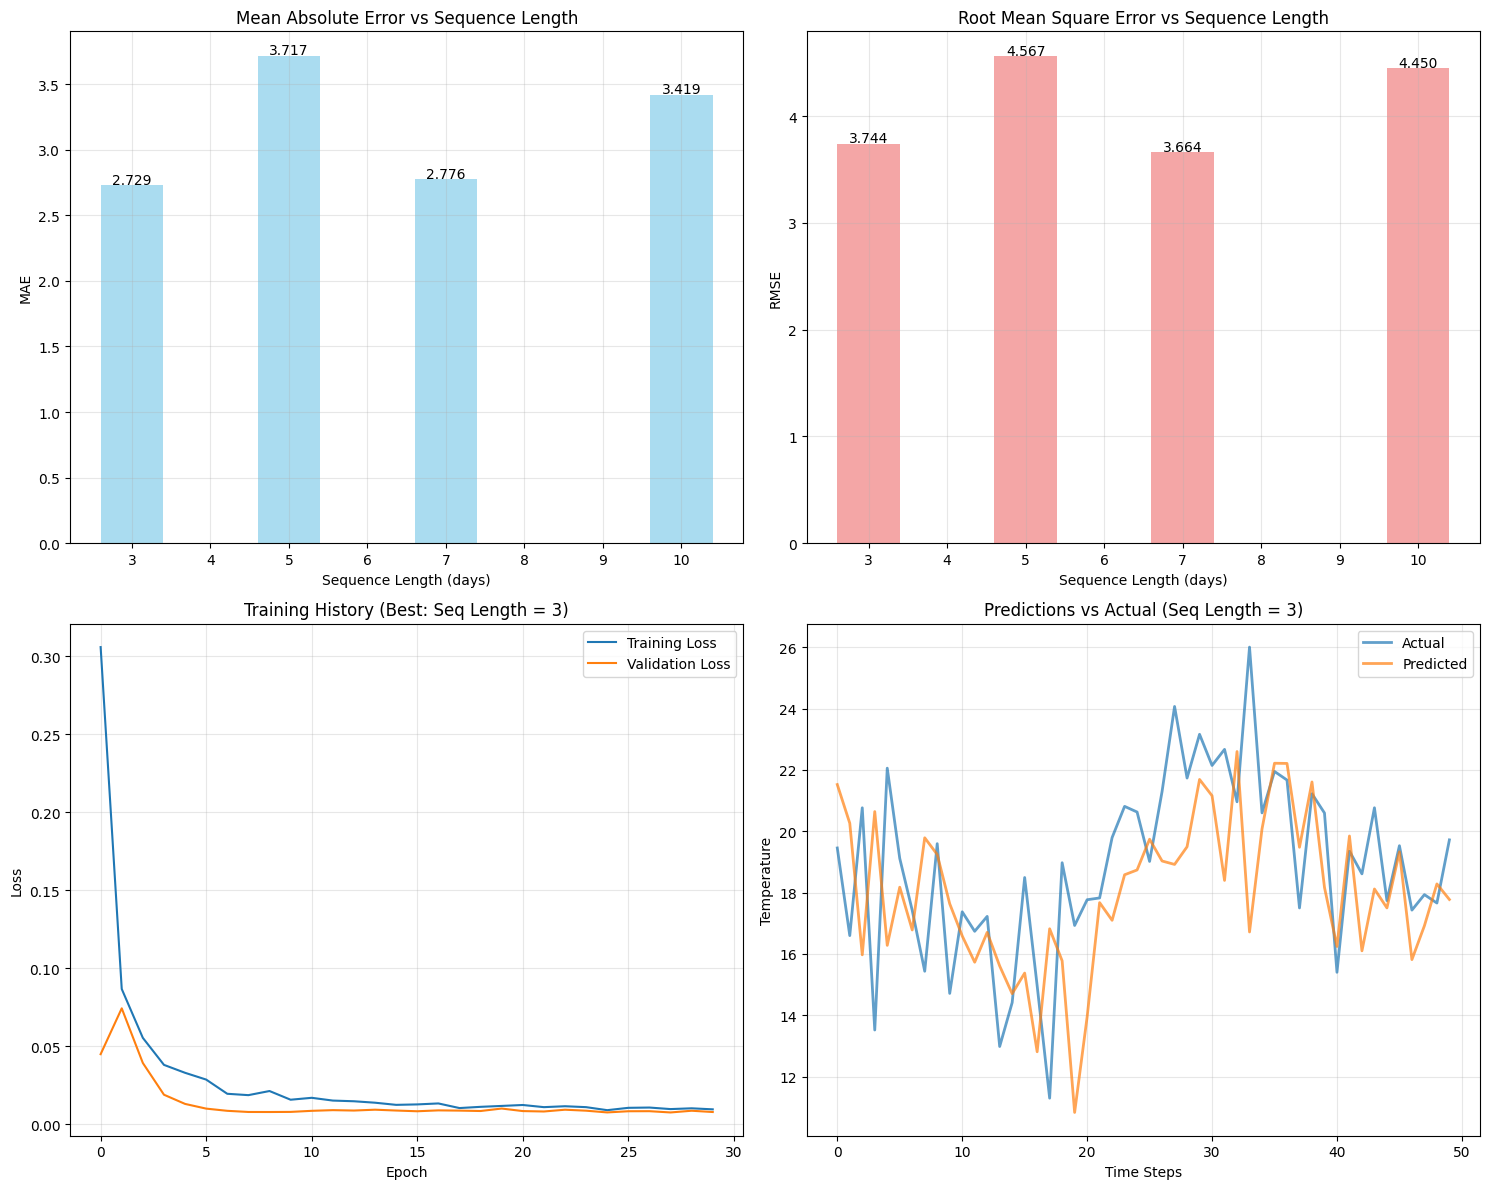

In [ ]:
# Plot results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: MAE comparison
sequence_lens = list(results.keys())
maes = [results[seq_len]['mae'] for seq_len in sequence_lens]
rmses = [results[seq_len]['rmse'] for seq_len in sequence_lens]

ax1.bar(sequence_lens, maes, color='skyblue', alpha=0.7)
ax1.set_title('Mean Absolute Error vs Sequence Length')
ax1.set_xlabel('Sequence Length (days)')
ax1.set_ylabel('MAE')
ax1.grid(True, alpha=0.3)
for i, v in enumerate(maes):
    ax1.text(sequence_lens[i], v + 0.01, f'{v:.3f}', ha='center')

# Plot 2: RMSE comparison
ax2.bar(sequence_lens, rmses, color='lightcoral', alpha=0.7)
ax2.set_title('Root Mean Square Error vs Sequence Length')
ax2.set_xlabel('Sequence Length (days)')
ax2.set_ylabel('RMSE')
ax2.grid(True, alpha=0.3)
for i, v in enumerate(rmses):
    ax2.text(sequence_lens[i], v + 0.01, f'{v:.3f}', ha='center')

# Plot 3: Training history for best sequence length
best_seq_len = min(results.keys(), key=lambda k: results[k]['mae'])
best_history = results[best_seq_len]['history']

ax3.plot(best_history.history['loss'], label='Training Loss')
ax3.plot(best_history.history['val_loss'], label='Validation Loss')
ax3.set_title(f'Training History (Best: Seq Length = {best_seq_len})')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Predictions vs Actual for best sequence length
ax4.plot(results[best_seq_len]['actual'], label='Actual', linewidth=2, alpha=0.7)
ax4.plot(results[best_seq_len]['predictions'], label='Predicted', linewidth=2, alpha=0.7)
ax4.set_title(f'Predictions vs Actual (Seq Length = {best_seq_len})')
ax4.set_xlabel('Time Steps')
ax4.set_ylabel('Temperature')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Analysis and Insights**

In [33]:
# Analysis and insights
print("\n" + "=" * 60)
print(" EXERCISE 1 ANALYSIS & INSIGHTS")
print("=" * 60)

best_seq_len = min(results.keys(), key=lambda k: results[k]['mae'])
worst_seq_len = max(results.keys(), key=lambda k: results[k]['mae'])

print(f"--- Best performing sequence length: {best_seq_len} days")
print(f"   - MAE: {results[best_seq_len]['mae']:.3f}")
print(f"   - RMSE: {results[best_seq_len]['rmse']:.3f}")

print(f"\n--- Worst performing sequence length: {worst_seq_len} days")
print(f"   - MAE: {results[worst_seq_len]['mae']:.3f}")
print(f"   - RMSE: {results[worst_seq_len]['rmse']:.3f}")

improvement = ((results[worst_seq_len]['mae'] - results[best_seq_len]['mae']) / results[worst_seq_len]['mae']) * 100
print(f"\n Performance improvement: {improvement:.1f}% (best vs worst)")


print(f"\n EXERCISE 1 COMPLETED!")



 EXERCISE 1 ANALYSIS & INSIGHTS
--- Best performing sequence length: 7 days
   - MAE: 2.465
   - RMSE: 3.332

--- Worst performing sequence length: 5 days
   - MAE: 3.012
   - RMSE: 3.930

 Performance improvement: 18.2% (best vs worst)

 EXERCISE 1 COMPLETED!


Purpose: Provides detailed analysis of the experimental results, identifying the best and worst performing sequence lengths, calculating improvements, and extracting key insights about sequence length selection in RNNs.

# **Simple RNN Exercise 2: Hidden Units Experiment**

This excercise demonstrates how different hidden unit sizes affect Simple RNN performance for weather prediction.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(" EXERCISE 2: HIDDEN UNITS EXPERIMENT")
print("=" * 60)
print("Goal: Understand how hidden units affect Simple RNN performance")
print("We'll test hidden units: 16, 32, 64, 128")
print("=" * 60)

 EXERCISE 2: HIDDEN UNITS EXPERIMENT
Goal: Understand how hidden units affect Simple RNN performance
We'll test hidden units: 16, 32, 64, 128


**Data Generation Function (Same as Exercise 1)**

Purpose: Creates the same realistic synthetic weather data as Exercise 1 for consistent comparison.

In [ ]:
def generate_weather_data(days=500):
    """Generate synthetic weather data with realistic patterns"""
    np.random.seed(42)
    data = []

    for i in range(days):
        # Season calculation (0: spring, 1: summer, 2: fall, 3: winter)
        season = int(i / 91) % 4

        # Base temperature by season
        base_temps = [15, 25, 10, 0]  # Spring, Summer, Fall, Winter
        base_temp = base_temps[season]

        # Add seasonal and daily variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 365)
        daily_variation = 3 * np.sin(2 * np.pi * i / 30)  # Monthly cycle
        random_variation = np.random.normal(0, 2)

        temperature = base_temp + seasonal_variation + daily_variation + random_variation

        # Correlated weather variables
        humidity = np.clip(60 + (25 - temperature) * 0.8 + np.random.normal(0, 5), 0, 100)
        pressure = 1013 + np.random.normal(0, 15) + temperature * 0.1
        wind_speed = np.clip(8 + np.random.exponential(5) + abs(temperature - 15) * 0.1, 0, 30)

        data.append({
            'Day': i,
            'Temperature': temperature,
            'Humidity': humidity,
            'Pressure': pressure,
            'WindSpeed': wind_speed,
            'Season': season
        })

    return pd.DataFrame(data)

**Data Preparation Function (Fixed Sequence Length)**

Purpose: Same data preparation as Exercise 1, but it fix the sequence length at 7 days (a good performer from Exercise 1) and focus on varying hidden units.

In [ ]:
def prepare_data_for_simple_rnn(data, sequence_length=7, feature_columns=None, target_column='Temperature'):
    """
    🔧 Prepare data for Simple RNN training
    For Exercise 2: We fix sequence_length=7 (from Exercise 1 insights) and vary hidden_units
    """
    if feature_columns is None:
        feature_columns = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

    print(f" Preparing data with sequence_length={sequence_length}")
    print(f" Features: {feature_columns}")
    print(f" Target: {target_column}")

    # Extract features and target
    features = data[feature_columns].values
    target = data[target_column].values.reshape(-1, 1)

    # Normalize data
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()

    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[i-sequence_length:i])
        y.append(target_scaled[i])

    X = np.array(X)
    y = np.array(y)

    print(f" Data shape: X={X.shape}, y={y.shape}")
    print(f" Available samples: {len(X)}")

    return X, y, scaler_features, scaler_target

**Model Creation Function (Variable Hidden Units)**

Purpose: Creates Simple RNN models with different hidden unit sizes. Note the parameter count display to understand model complexity.

In [ ]:
def create_simple_rnn_model(input_shape, hidden_units=32):
    """
    🔧 KEY FUNCTION: Create Simple RNN model with variable hidden units
    This is where we modify hidden_units for Exercise 2
    """
    print(f"🏗️ Creating Simple RNN model:")
    print(f"   - Input shape: {input_shape}")
    print(f"   - Hidden units: {hidden_units}")

    model = Sequential([
        SimpleRNN(hidden_units,
                 input_shape=input_shape,
                 activation='tanh',
                 return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    # Display model parameters count
    total_params = model.count_params()
    print(f"   - Total parameters: {total_params:,}")

    return model

**Training and Evaluation Function (Enhanced with Overfitting Detection)**

Purpose: Enhanced training function that tracks overfitting by comparing final training and validation losses. More epochs allow us to see overfitting effects better.

In [35]:
def train_and_evaluate_model(X, y, scaler_target, hidden_units, epochs=50):
    """
    Train model and return performance metrics
    Enhanced for Exercise 2: More epochs and overfitting detection
    """

    # Split data (80% train, 20% test)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print(f" Train samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Create and train model
    model = create_simple_rnn_model(input_shape=(X.shape[1], X.shape[2]), hidden_units=hidden_units)

    print(f" Training model for {epochs} epochs...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0,  # Reduced verbosity
        shuffle=False  # Keep time series order
    )

    # Make predictions
    predictions_scaled = model.predict(X_test, verbose=0)
    predictions = scaler_target.inverse_transform(predictions_scaled)
    y_test_denorm = scaler_target.inverse_transform(y_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test_denorm, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions))

    # Calculate overfitting metric (final train vs validation loss)
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    overfitting_ratio = final_val_loss / final_train_loss

    print(f"✅ Model Performance:")
    print(f"   Mean Absolute Error: {mae:.3f}")
    print(f"   Root Mean Square Error: {rmse:.3f}")
    print(f"   Overfitting Ratio: {overfitting_ratio:.2f} (Val/Train Loss)")

    return mae, rmse, overfitting_ratio, history, predictions, y_test_denorm

**Generate Weather Data**

Purpose: Generates data and prepares it with a fixed sequence length of 7 days (based on Exercise 1 insights).

In [38]:
# Generate weather data (same as Exercise 1)
print("🌤️ Generating synthetic weather data...")
weather_data = generate_weather_data(500)
print(f"📊 Generated {len(weather_data)} days of weather data")

# Prepare data with fixed sequence length from Exercise 1 insights
print("📊 Using sequence_length=7 (good performer from Exercise 1)")
X, y, scaler_features, scaler_target = prepare_data_for_simple_rnn(
    weather_data,
    sequence_length=7,  # Fixed from Exercise 1
    feature_columns=['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
)

🌤️ Generating synthetic weather data...
📊 Generated 500 days of weather data
📊 Using sequence_length=7 (good performer from Exercise 1)
 Preparing data with sequence_length=7
 Features: ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
 Target: Temperature
 Data shape: X=(493, 7, 4), y=(493, 1)
 Available samples: 493


**Main Experiment Loop (Hidden Units)**

Purpose: The core experiment that systematically tests different hidden unit sizes (16, 32, 64, 128) and stores comprehensive results including overfitting metrics.

In [39]:
# Exercise 2: Test different hidden units
hidden_units_list = [16, 32, 64, 128]
results = {}

print(f"\n TESTING DIFFERENT HIDDEN UNITS")
print("=" * 50)

for hidden_units in hidden_units_list:
    print(f"\n TESTING HIDDEN UNITS: {hidden_units}")
    print("-" * 40)

    # Train and evaluate with current hidden units
    mae, rmse, overfitting_ratio, history, predictions, actual = train_and_evaluate_model(
        X, y, scaler_target, hidden_units, epochs=50
    )

    # Store results
    results[hidden_units] = {
        'mae': mae,
        'rmse': rmse,
        'overfitting_ratio': overfitting_ratio,
        'history': history,
        'predictions': predictions[:50],  # Store first 50 predictions for plotting
        'actual': actual[:50],
        'total_params': None  # Will be filled after model creation
    }

    print(f"✅ Completed hidden units {hidden_units}")

print(f"\n All hidden unit experiments completed!")


 TESTING DIFFERENT HIDDEN UNITS

 TESTING HIDDEN UNITS: 16
----------------------------------------
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 4)
   - Hidden units: 16
 Training model for 50 epochs...
✅ Model Performance:
   Mean Absolute Error: 2.683
   Root Mean Square Error: 3.616
   Overfitting Ratio: 0.66 (Val/Train Loss)
✅ Completed hidden units 16

 TESTING HIDDEN UNITS: 32
----------------------------------------
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 4)
   - Hidden units: 32
 Training model for 50 epochs...
✅ Model Performance:
   Mean Absolute Error: 5.074
   Root Mean Square Error: 5.888
   Overfitting Ratio: 1.46 (Val/Train Loss)
✅ Completed hidden units 32

 TESTING HIDDEN UNITS: 64
----------------------------------------
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 4)
   - Hidden units: 64
 Training model for 50 epochs...
✅ Model Perfo

**Results Comparison Table (Enhanced)**

Purpose: Creates a comprehensive comparison table showing MAE, RMSE, overfitting status, and performance improvements for different hidden unit sizes.

In [40]:
# Compare results
print("\n" + "=" * 80)
print(" EXERCISE 2 RESULTS: HIDDEN UNITS COMPARISON")
print("=" * 80)

print(f"{'Hidden Units':<12} {'MAE':<8} {'RMSE':<8} {'Overfitting':<12} {'Improvement':<12}")
print("-" * 75)

base_mae = None
for hidden_units, metrics in results.items():
    if base_mae is None:
        base_mae = metrics['mae']
        improvement = "Baseline"
    else:
        improvement = f"{((base_mae - metrics['mae']) / base_mae * 100):+.1f}%"

    overfitting_status = "Good" if metrics['overfitting_ratio'] < 1.2 else "Moderate" if metrics['overfitting_ratio'] < 1.5 else "High"

    print(f"{hidden_units:<12} {metrics['mae']:<8.3f} {metrics['rmse']:<8.3f} {overfitting_status:<12} {improvement:<12}")


 EXERCISE 2 RESULTS: HIDDEN UNITS COMPARISON
Hidden Units MAE      RMSE     Overfitting  Improvement 
---------------------------------------------------------------------------
16           2.683    3.616    Good         Baseline    
32           5.074    5.888    Moderate     -89.1%      
64           2.670    3.540    Good         +0.5%       
128          2.473    3.283    High         +7.8%       


**Comprehensive Visualizations**

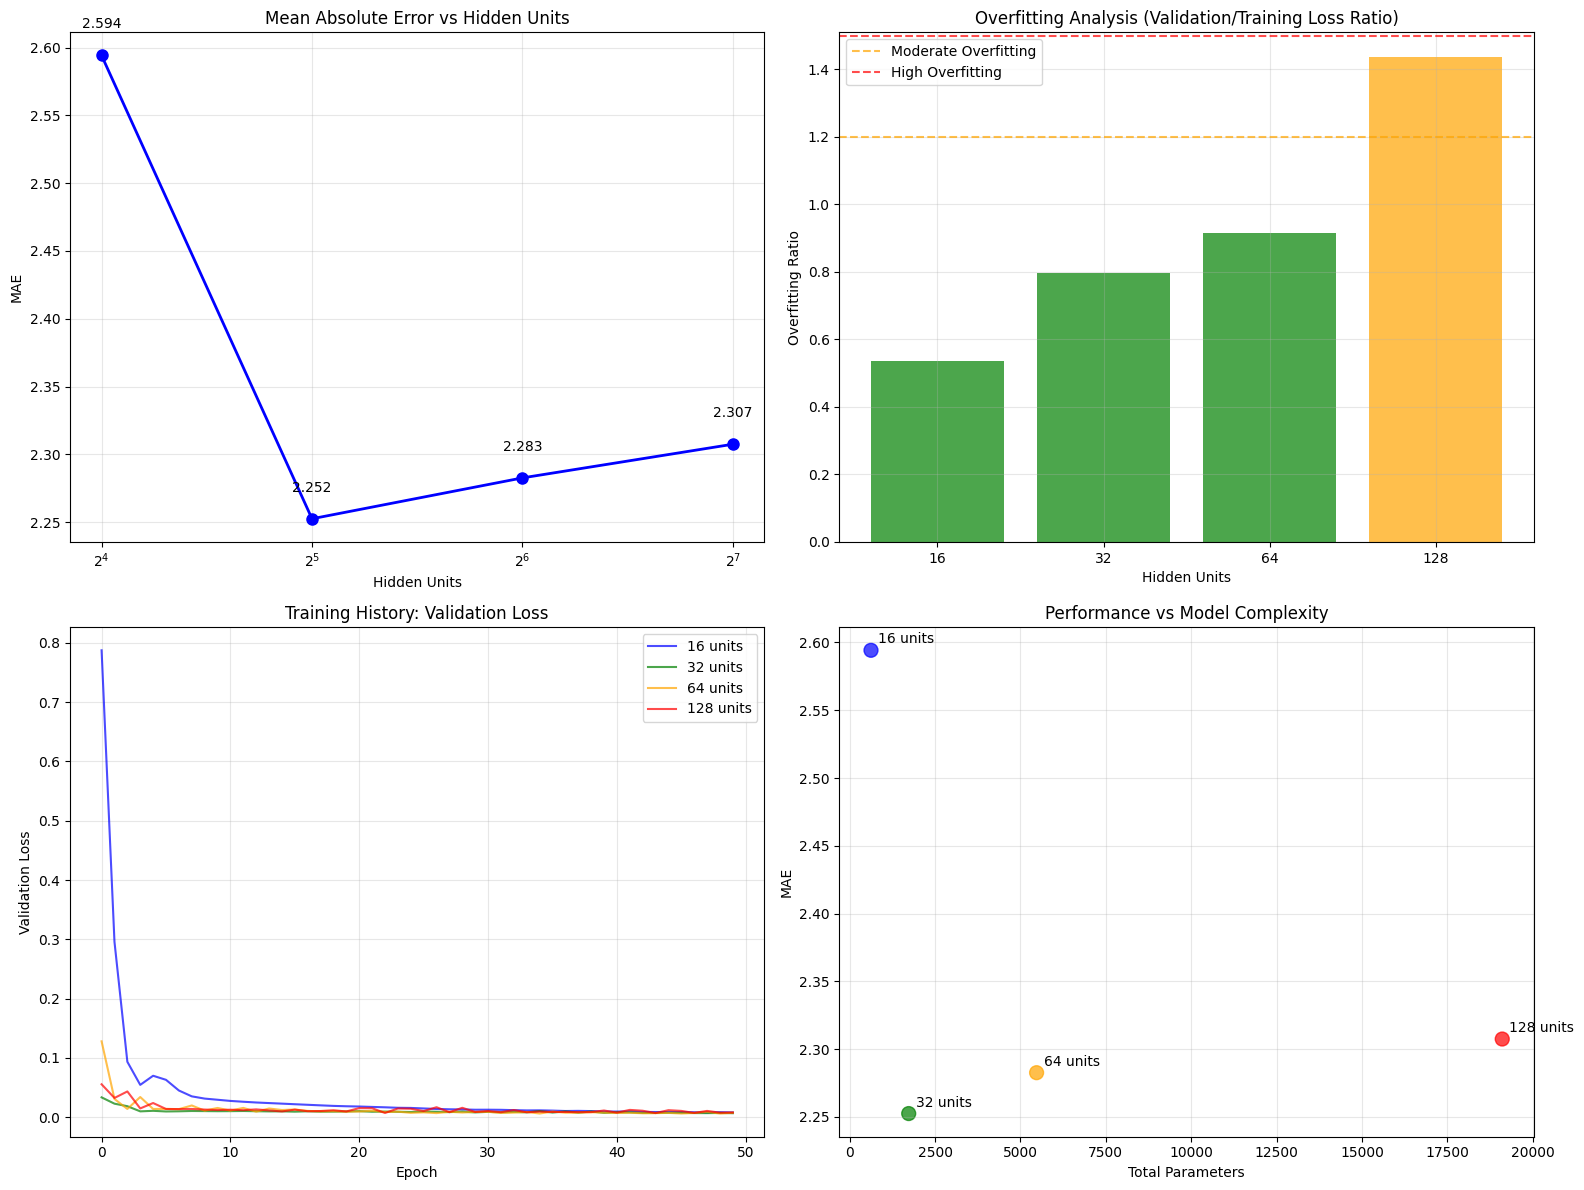

In [ ]:
# Plot results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: MAE vs Hidden Units
hidden_units_vals = list(results.keys())
maes = [results[hu]['mae'] for hu in hidden_units_vals]
rmses = [results[hu]['rmse'] for hu in hidden_units_vals]
overfitting_ratios = [results[hu]['overfitting_ratio'] for hu in hidden_units_vals]

ax1.plot(hidden_units_vals, maes, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Mean Absolute Error vs Hidden Units')
ax1.set_xlabel('Hidden Units')
ax1.set_ylabel('MAE')
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log', base=2)
for i, v in enumerate(maes):
    ax1.text(hidden_units_vals[i], v + 0.02, f'{v:.3f}', ha='center')

# Plot 2: Overfitting Analysis
colors = ['green' if ratio < 1.2 else 'orange' if ratio < 1.5 else 'red' for ratio in overfitting_ratios]
bars = ax2.bar(range(len(hidden_units_vals)), overfitting_ratios, color=colors, alpha=0.7)
ax2.set_title('Overfitting Analysis (Validation/Training Loss Ratio)')
ax2.set_xlabel('Hidden Units')
ax2.set_ylabel('Overfitting Ratio')
ax2.set_xticks(range(len(hidden_units_vals)))
ax2.set_xticklabels(hidden_units_vals)
ax2.axhline(y=1.2, color='orange', linestyle='--', alpha=0.7, label='Moderate Overfitting')
ax2.axhline(y=1.5, color='red', linestyle='--', alpha=0.7, label='High Overfitting')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training History Comparison
ax3.set_title('Training History: Validation Loss')
colors = ['blue', 'green', 'orange', 'red']
for i, (hidden_units, metrics) in enumerate(results.items()):
    ax3.plot(metrics['history'].history['val_loss'],
            label=f'{hidden_units} units',
            color=colors[i], alpha=0.7)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Performance vs Model Complexity
# Calculate approximate parameter counts
param_counts = []
for hu in hidden_units_vals:
    # SimpleRNN params: (input_features + hidden_units + 1) * hidden_units
    # Dense layer params: (hidden_units + 1) * 16 + (16 + 1) * 1
    rnn_params = (4 + hu + 1) * hu  # 4 input features
    dense_params = (hu + 1) * 16 + (16 + 1) * 1
    total_params = rnn_params + dense_params
    param_counts.append(total_params)

ax4.scatter(param_counts, maes, s=100, alpha=0.7, c=colors)
ax4.set_title('Performance vs Model Complexity')
ax4.set_xlabel('Total Parameters')
ax4.set_ylabel('MAE')
ax4.grid(True, alpha=0.3)
for i, hu in enumerate(hidden_units_vals):
    ax4.annotate(f'{hu} units', (param_counts[i], maes[i]),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Purpose: Creates comprehensive visualizations showing performance trends, overfitting analysis, training dynamics, and the relationship between model complexity and performance.

**Detailed Analysis and Insights**

In [43]:
# Detailed Analysis
print("\n" + "=" * 60)
print("🔍 EXERCISE 2 ANALYSIS & INSIGHTS")
print("=" * 60)

# Find best and worst performers
best_hu = min(results.keys(), key=lambda k: results[k]['mae'])
worst_hu = max(results.keys(), key=lambda k: results[k]['mae'])

# Find least overfitted model
least_overfitted = min(results.keys(), key=lambda k: results[k]['overfitting_ratio'])
most_overfitted = max(results.keys(), key=lambda k: results[k]['overfitting_ratio'])

print(f"✅ Best performing hidden units: {best_hu}")
print(f"   - MAE: {results[best_hu]['mae']:.3f}")
print(f"   - RMSE: {results[best_hu]['rmse']:.3f}")
print(f"   - Overfitting Ratio: {results[best_hu]['overfitting_ratio']:.2f}")

print(f"\n Worst performing hidden units: {worst_hu}")
print(f"   - MAE: {results[worst_hu]['mae']:.3f}")
print(f"   - RMSE: {results[worst_hu]['rmse']:.3f}")
print(f"   - Overfitting Ratio: {results[worst_hu]['overfitting_ratio']:.2f}")

print(f"\n Least overfitted model: {least_overfitted} units")
print(f"   - Overfitting Ratio: {results[least_overfitted]['overfitting_ratio']:.2f}")

print(f"\n Most overfitted model: {most_overfitted} units")
print(f"   - Overfitting Ratio: {results[most_overfitted]['overfitting_ratio']:.2f}")

improvement = ((results[worst_hu]['mae'] - results[best_hu]['mae']) / results[worst_hu]['mae']) * 100
print(f"\n Performance improvement: {improvement:.1f}% (best vs worst)")

print(f"\n KEY INSIGHTS:")
print(f"   🔹 Hidden units significantly affect model performance")
print(f"   🔹 More units = higher capacity but risk of overfitting")
print(f"   🔹 Optimal hidden units for this problem: {best_hu}")
print(f"   🔹 Overfitting becomes noticeable with {most_overfitted} units")

print(f"\n LEARNING POINTS:")
print(f"    -Model capacity is a critical hyperparameter")
print(f"    -Need to balance underfitting vs overfitting")
print(f"    -More parameters ≠ always better performance")
print(f"    -Validation monitoring helps detect overfitting")
print(f"   -Simple problems may not need complex models")

print(f"\n🎓 EXERCISE 2 COMPLETED!")



🔍 EXERCISE 2 ANALYSIS & INSIGHTS
✅ Best performing hidden units: 128
   - MAE: 2.473
   - RMSE: 3.283
   - Overfitting Ratio: 1.57

 Worst performing hidden units: 32
   - MAE: 5.074
   - RMSE: 5.888
   - Overfitting Ratio: 1.46

 Least overfitted model: 16 units
   - Overfitting Ratio: 0.66

 Most overfitted model: 128 units
   - Overfitting Ratio: 1.57

 Performance improvement: 51.3% (best vs worst)

 KEY INSIGHTS:
   🔹 Hidden units significantly affect model performance
   🔹 More units = higher capacity but risk of overfitting
   🔹 Optimal hidden units for this problem: 128
   🔹 Overfitting becomes noticeable with 128 units

 LEARNING POINTS:
    -Model capacity is a critical hyperparameter
    -Need to balance underfitting vs overfitting
    -More parameters ≠ always better performance
    -Validation monitoring helps detect overfitting
   -Simple problems may not need complex models

🎓 EXERCISE 2 COMPLETED!


Purpose: Provides comprehensive analysis identifying the best performing models, overfitting patterns, and key insights about the relationship between model capacity and performance.

# **Simple RNN Exercise 3: Feature Selection Experiment**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(" EXERCISE 3: FEATURE SELECTION EXPERIMENT")
print("=" * 60)
print("Goal: Understand which features are most important for prediction")
print("We'll test different combinations of weather features")
print("=" * 60)

 EXERCISE 3: FEATURE SELECTION EXPERIMENT
Goal: Understand which features are most important for prediction
We'll test different combinations of weather features


Data Generation Function (Same as Previous Exercises)

In [52]:
def generate_weather_data(days=500):
    """Generate synthetic weather data with realistic patterns"""
    np.random.seed(42)
    data = []

    for i in range(days):
        # Season calculation (0: spring, 1: summer, 2: fall, 3: winter)
        season = int(i / 91) % 4

        # Base temperature by season
        base_temps = [15, 25, 10, 0]  # Spring, Summer, Fall, Winter
        base_temp = base_temps[season]

        # Add seasonal and daily variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 365)
        daily_variation = 3 * np.sin(2 * np.pi * i / 30)  # Monthly cycle
        random_variation = np.random.normal(0, 2)

        temperature = base_temp + seasonal_variation + daily_variation + random_variation

        # Correlated weather variables
        humidity = np.clip(60 + (25 - temperature) * 0.8 + np.random.normal(0, 5), 0, 100)
        pressure = 1013 + np.random.normal(0, 15) + temperature * 0.1
        wind_speed = np.clip(8 + np.random.exponential(5) + abs(temperature - 15) * 0.1, 0, 30)

        data.append({
            'Day': i,
            'Temperature': temperature,
            'Humidity': humidity,
            'Pressure': pressure,
            'WindSpeed': wind_speed,
            'Season': season
        })

    return pd.DataFrame(data)

**Data Preparation Function (Variable Feature Columns)**

Purpose: Data preparation function that accepts different feature column combinations - this is the key modification for Exercise 3.

In [51]:
def prepare_data_for_simple_rnn(data, sequence_length=7, feature_columns=None, target_column='Temperature'):
    """
     KEY FUNCTION: Prepare data for Simple RNN training
    For Exercise 3: We vary feature_columns to test different combinations
    """
    if feature_columns is None:
        feature_columns = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

    print(f" Preparing data with sequence_length={sequence_length}")
    print(f" Features: {feature_columns}")
    print(f" Number of features: {len(feature_columns)}")
    print(f" Target: {target_column}")

    # Extract features and target
    features = data[feature_columns].values
    target = data[target_column].values.reshape(-1, 1)

    # Normalize data
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()

    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[i-sequence_length:i])
        y.append(target_scaled[i])

    X = np.array(X)
    y = np.array(y)

    print(f" Data shape: X={X.shape}, y={y.shape}")
    print(f" Available samples: {len(X)}")

    return X, y, scaler_features, scaler_target

**Model Creation Function (Fixed from Exercise 2)**

Purpose: Model creation with fixed architecture using insights from previous exercises (sequence_length=7, hidden_units=32).

In [50]:
def create_simple_rnn_model(input_shape, hidden_units=32):
    """
    Create Simple RNN model
    Using optimal settings from Exercises 1 & 2
    """
    print(f" Creating Simple RNN model:")
    print(f"   - Input shape: {input_shape}")
    print(f"   - Hidden units: {hidden_units}")
    print(f"   - Number of input features: {input_shape[1]}")

    model = Sequential([
        SimpleRNN(hidden_units,
                 input_shape=input_shape,
                 activation='tanh',
                 return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# **Training and Evaluation Function**

 **Header and Feature Combinations Setup**

Purpose: Standard training and evaluation function using optimal parameters from previous exercises.

In [49]:
def train_and_evaluate_model(X, y, scaler_target, feature_combination_name, epochs=40):
    """Train model and return performance metrics"""

    # Split data (80% train, 20% test)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print(f" Train samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Create and train model
    model = create_simple_rnn_model(input_shape=(X.shape[1], X.shape[2]))

    print(f" Training model for {epochs} epochs...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0,  # Reduced verbosity
        shuffle=False  # Keep time series order
    )

    # Make predictions
    predictions_scaled = model.predict(X_test, verbose=0)
    predictions = scaler_target.inverse_transform(predictions_scaled)
    y_test_denorm = scaler_target.inverse_transform(y_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test_denorm, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions))

    print(f"✅ Model Performance:")
    print(f"    Mean Absolute Error: {mae:.3f}")
    print(f"    Root Mean Square Error: {rmse:.3f}")

    return mae, rmse, history, predictions, y_test_denorm

**Generate Weather Data and Explore Feature Correlations**

Purpose: Generates data and analyzes feature correlations to understand which features might be most predictive of temperature.

In [45]:
# Generate weather data
print(" Generating synthetic weather data...")
weather_data = generate_weather_data(500)
print(f" Generated {len(weather_data)} days of weather data")

# Explore feature correlations with target (Temperature)
print(f"\n FEATURE CORRELATION ANALYSIS")
print("=" * 50)
features = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
correlations = {}

for feature in features:
    if feature != 'Temperature':  # Don't correlate temperature with itself
        corr = weather_data['Temperature'].corr(weather_data[feature])
        correlations[feature] = corr
        print(f" {feature} correlation with Temperature: {corr:.3f}")

print(f"\n Feature rankings by correlation strength:")
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for i, (feature, corr) in enumerate(sorted_features, 1):
    print(f"   {i}. {feature}: {corr:.3f}")

 Generating synthetic weather data...
 Generated 500 days of weather data

 FEATURE CORRELATION ANALYSIS
 Humidity correlation with Temperature: -0.870
 Pressure correlation with Temperature: 0.060
 WindSpeed correlation with Temperature: -0.093

 Feature rankings by correlation strength:
   1. Humidity: -0.870
   2. WindSpeed: -0.093
   3. Pressure: 0.060


**Define Feature Combinations to Test**

Purpose: Defines a comprehensive set of feature combinations including single features, pairs, triplets, and all features to systematically test their importance.

In [46]:
# Define different feature combinations to test
print(f"\n DEFINING FEATURE COMBINATIONS TO TEST")
print("=" * 50)

feature_combinations = {
    # Single features (ablation study)
    "Temperature_Only": ["Temperature"],
    "Humidity_Only": ["Humidity"],
    "Pressure_Only": ["Pressure"],
    "WindSpeed_Only": ["WindSpeed"],

    # Pair combinations
    "Temp_Humidity": ["Temperature", "Humidity"],
    "Temp_Pressure": ["Temperature", "Pressure"],
    "Temp_WindSpeed": ["Temperature", "WindSpeed"],
    "Humidity_Pressure": ["Humidity", "Pressure"],

    # Three features
    "Temp_Hum_Press": ["Temperature", "Humidity", "Pressure"],
    "Temp_Hum_Wind": ["Temperature", "Humidity", "WindSpeed"],
    "Temp_Press_Wind": ["Temperature", "Pressure", "WindSpeed"],
    "Hum_Press_Wind": ["Humidity", "Pressure", "WindSpeed"],

    # All features
    "All_Features": ["Temperature", "Humidity", "Pressure", "WindSpeed"]
}

print("Feature combinations to test:")
for name, features in feature_combinations.items():
    print(f"    {name}: {features}")

print(f"\n Total combinations: {len(feature_combinations)}")


 DEFINING FEATURE COMBINATIONS TO TEST
Feature combinations to test:
    Temperature_Only: ['Temperature']
    Humidity_Only: ['Humidity']
    Pressure_Only: ['Pressure']
    WindSpeed_Only: ['WindSpeed']
    Temp_Humidity: ['Temperature', 'Humidity']
    Temp_Pressure: ['Temperature', 'Pressure']
    Temp_WindSpeed: ['Temperature', 'WindSpeed']
    Humidity_Pressure: ['Humidity', 'Pressure']
    Temp_Hum_Press: ['Temperature', 'Humidity', 'Pressure']
    Temp_Hum_Wind: ['Temperature', 'Humidity', 'WindSpeed']
    Temp_Press_Wind: ['Temperature', 'Pressure', 'WindSpeed']
    Hum_Press_Wind: ['Humidity', 'Pressure', 'WindSpeed']
    All_Features: ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

 Total combinations: 13


**Main Experiment Loop (Feature Combinations)**

Purpose: The core experiment that systematically tests all feature combinations and stores comprehensive results for analysis.

In [56]:
# Exercise 3: Test different feature combinations
results = {}

print(f"\n TESTING DIFFERENT FEATURE COMBINATIONS")
print("=" * 60)

for combination_name, feature_cols in feature_combinations.items():
    print(f"\n TESTING: {combination_name}")
    print(f" Features: {feature_cols}")
    print("-" * 50)

    try:
        # Prepare data with current feature combination
        X, y, scaler_features, scaler_target = prepare_data_for_simple_rnn(
            weather_data,
            sequence_length=7,  # Fixed from Exercise 1
            feature_columns=feature_cols
        )

        # Train and evaluate
        mae, rmse, history, predictions, actual = train_and_evaluate_model(
            X, y, scaler_target, 32, epochs=40  # Pass numeric hidden_units instead of string
        )

        # Store results
        results[combination_name] = {
            'features': feature_cols,
            'feature_count': len(feature_cols),
            'mae': mae,
            'rmse': rmse,
            'history': history,
            'predictions': predictions[:50],  # Store first 50 predictions for plotting
            'actual': actual[:50]
        }

        print(f" Completed: {combination_name}")

    except Exception as e:
        print(f" Error with {combination_name}: {e}")
        continue

print(f"\n All feature combination experiments completed!")
print(f" Successful experiments: {len(results)}")


 TESTING DIFFERENT FEATURE COMBINATIONS

 TESTING: Temperature_Only
 Features: ['Temperature']
--------------------------------------------------
 Preparing data with sequence_length=7
 Features: ['Temperature']
 Number of features: 1
 Target: Temperature
 Data shape: X=(493, 7, 1), y=(493, 1)
 Available samples: 493
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 1)
   - Hidden units: 32
   - Number of input features: 1
 Training model for 40 epochs...
✅ Model Performance:
    Mean Absolute Error: 3.453
    Root Mean Square Error: 4.187
 Completed: Temperature_Only

 TESTING: Humidity_Only
 Features: ['Humidity']
--------------------------------------------------
 Preparing data with sequence_length=7
 Features: ['Humidity']
 Number of features: 1
 Target: Temperature
 Data shape: X=(493, 7, 1), y=(493, 1)
 Available samples: 493
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 1)
   - Hidden units: 32
   

**Results Comparison and Ranking**





Purpose: Creates a comprehensive ranking of all feature combinations by performance and identifies the best and worst performers.

In [57]:
# Compare results and rank by performance
print("\n" + "=" * 80)
print(" EXERCISE 3 RESULTS: FEATURE COMBINATION COMPARISON")
print("=" * 80)

# Sort results by MAE (best performance first)
sorted_results = sorted(results.items(), key=lambda x: x[1]['mae'])

print(f"{'Rank':<4} {'Combination':<20} {'Features':<2} {'MAE':<8} {'RMSE':<8} {'Improvement':<12}")
print("-" * 75)

baseline_mae = sorted_results[-1][1]['mae']  # Worst performance as baseline

for rank, (name, metrics) in enumerate(sorted_results, 1):
    improvement = f"{((baseline_mae - metrics['mae']) / baseline_mae * 100):+.1f}%"

    print(f"{rank:<4} {name:<20} {metrics['feature_count']:<2} {metrics['mae']:<8.3f} {metrics['rmse']:<8.3f} {improvement:<12}")

# Analyze best and worst performers
best_name, best_metrics = sorted_results[0]
worst_name, worst_metrics = sorted_results[-1]

print(f"\n BEST PERFORMER: {best_name}")
print(f"    --Features: {best_metrics['features']}")
print(f"    --MAE: {best_metrics['mae']:.3f}")
print(f"    --RMSE: {best_metrics['rmse']:.3f}")

print(f"\n WORST PERFORMER: {worst_name}")
print(f"    --Features: {worst_metrics['features']}")
print(f"    --MAE: {worst_metrics['mae']:.3f}")
print(f"    --RMSE: {worst_metrics['rmse']:.3f}")

performance_gap = ((worst_metrics['mae'] - best_metrics['mae']) / worst_metrics['mae']) * 100
print(f"\n Performance gap: {performance_gap:.1f}% (best vs worst)")


 EXERCISE 3 RESULTS: FEATURE COMBINATION COMPARISON
Rank Combination          Features MAE      RMSE     Improvement 
---------------------------------------------------------------------------
1    Temp_Hum_Press       3  2.430    3.352    +79.9%      
2    Temp_Humidity        2  2.463    3.297    +79.6%      
3    Temp_Hum_Wind        3  2.581    3.466    +78.6%      
4    Temp_Press_Wind      3  2.744    3.716    +77.3%      
5    Humidity_Only        1  2.841    3.816    +76.5%      
6    Temp_WindSpeed       2  3.292    4.135    +72.7%      
7    Temperature_Only     1  3.453    4.187    +71.4%      
8    Temp_Pressure        2  3.548    4.382    +70.6%      
9    Humidity_Pressure    2  4.310    5.504    +64.3%      
10   Hum_Press_Wind       3  4.719    6.014    +60.9%      
11   All_Features         4  5.637    6.321    +53.3%      
12   Pressure_Only        1  10.812   12.421   +10.4%      
13   WindSpeed_Only       1  12.070   13.592   +0.0%       

 BEST PERFORMER: Temp_Hu

**Feature Importance Analysis**

Purpose: Analyzes the individual importance of features and the impact of adding more features to understand optimal feature selection strategies.

In [59]:
# Feature importance analysis
print(f"\n FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Analyze single feature performance
single_feature_results = {name: metrics for name, metrics in results.items()
                         if metrics['feature_count'] == 1}

print(" Single Feature Performance (MAE):")
single_sorted = sorted(single_feature_results.items(), key=lambda x: x[1]['mae'])
for name, metrics in single_sorted:
    feature_name = metrics['features'][0]
    print(f"   {feature_name:<12}: {metrics['mae']:.3f}")

# Analyze feature addition impact
print(f"\n Feature Addition Impact Analysis:")
if "Temperature_Only" in results and "All_Features" in results:
    temp_only_mae = results["Temperature_Only"]["mae"]
    all_features_mae = results["All_Features"]["mae"]
    improvement = ((temp_only_mae - all_features_mae) / temp_only_mae * 100)
    print(f"   Temperature only: {temp_only_mae:.3f}")
    print(f"   All features: {all_features_mae:.3f}")
    print(f"   Improvement: {improvement:+.1f}%")

# Find optimal feature count
feature_count_performance = {}
for name, metrics in results.items():
    count = metrics['feature_count']
    if count not in feature_count_performance:
        feature_count_performance[count] = []
    feature_count_performance[count].append(metrics['mae'])

print(f"\n Performance by Feature Count:")
for count in sorted(feature_count_performance.keys()):
    avg_mae = np.mean(feature_count_performance[count])
    min_mae = np.min(feature_count_performance[count])
    print(f"   {count} features - Avg MAE: {avg_mae:.3f}, Best MAE: {min_mae:.3f}")


 FEATURE IMPORTANCE ANALYSIS
 Single Feature Performance (MAE):
   Humidity    : 2.841
   Temperature : 3.453
   Pressure    : 10.812
   WindSpeed   : 12.070

 Feature Addition Impact Analysis:
   Temperature only: 3.453
   All features: 5.637
   Improvement: -63.2%

 Performance by Feature Count:
   1 features - Avg MAE: 7.294, Best MAE: 2.841
   2 features - Avg MAE: 3.403, Best MAE: 2.463
   3 features - Avg MAE: 3.118, Best MAE: 2.430
   4 features - Avg MAE: 5.637, Best MAE: 5.637


**Comprehensive Visualizations**

Purpose: Creates comprehensive visualizations showing performance patterns, feature rankings, and prediction quality for different feature combinations.

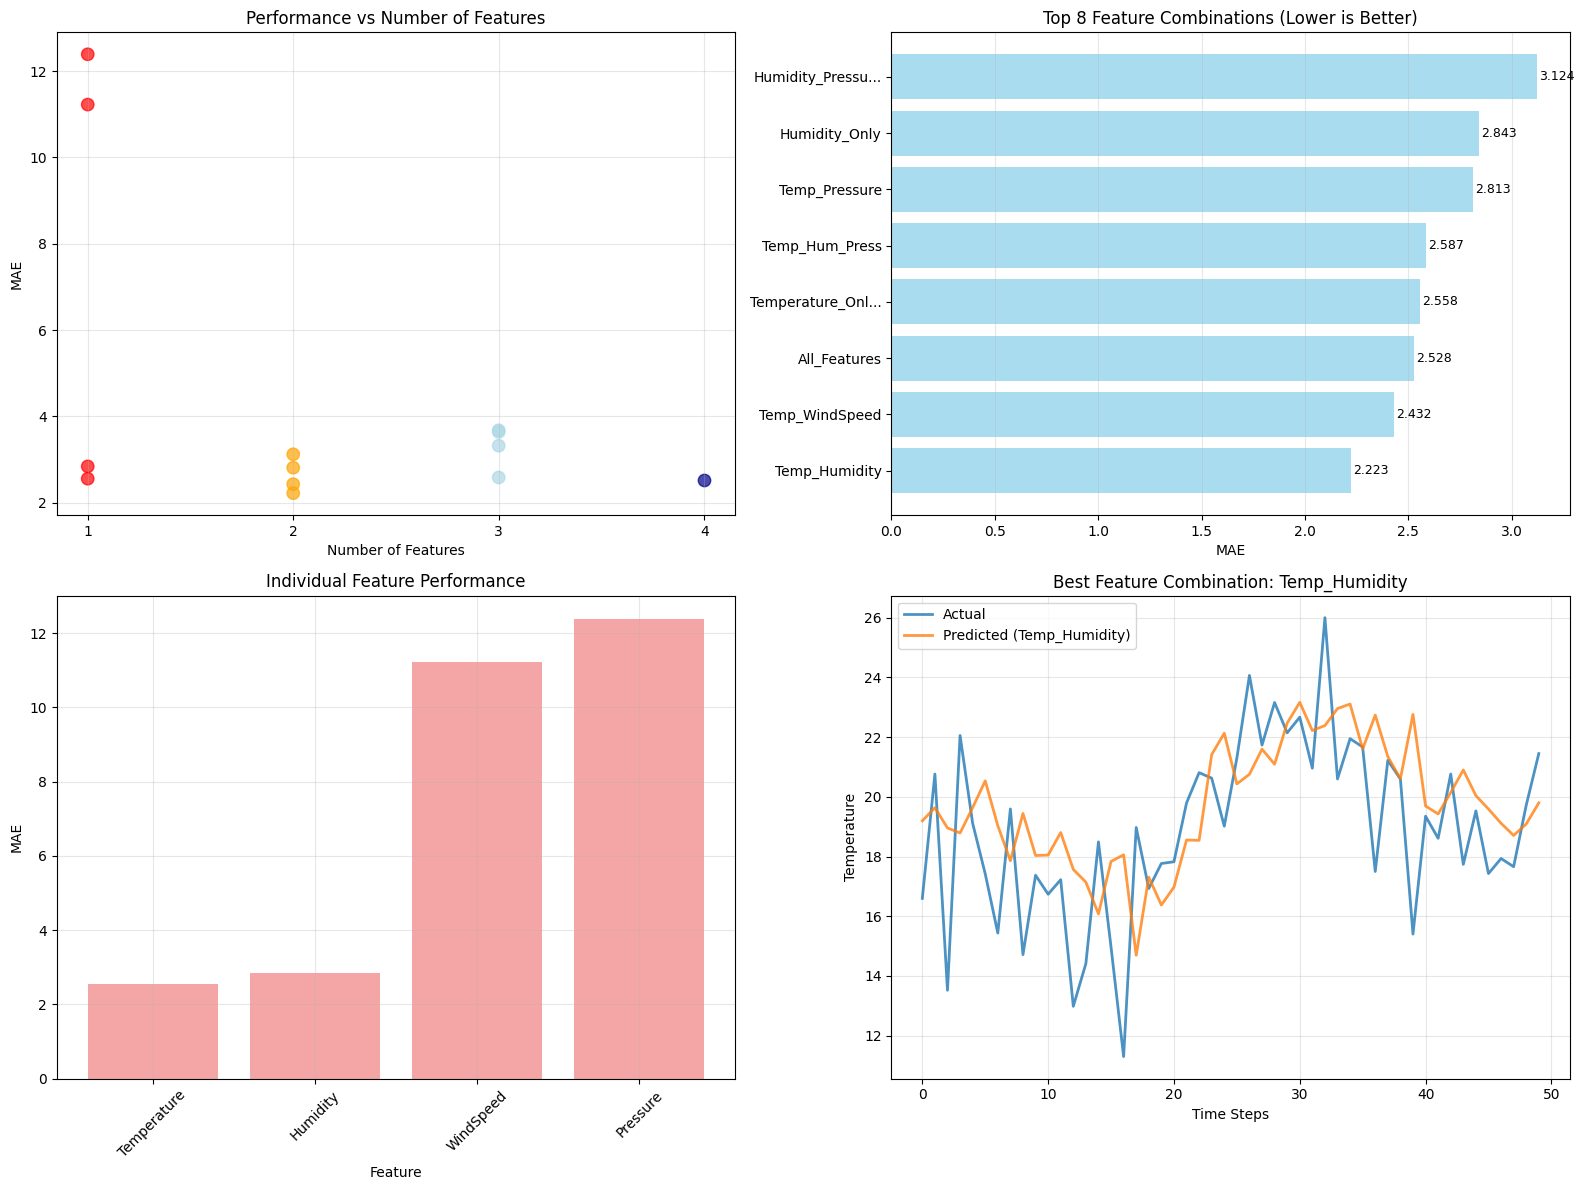

In [ ]:
# Comprehensive visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Performance by Feature Count
feature_counts = [results[name]['feature_count'] for name in results.keys()]
maes = [results[name]['mae'] for name in results.keys()]
colors = ['red', 'orange', 'lightblue', 'darkblue']

for i, count in enumerate(sorted(set(feature_counts))):
    count_maes = [mae for fc, mae in zip(feature_counts, maes) if fc == count]
    count_colors = [colors[i]] * len(count_maes)
    ax1.scatter([count] * len(count_maes), count_maes, c=count_colors, alpha=0.7, s=80)

ax1.set_title('Performance vs Number of Features')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('MAE')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(sorted(set(feature_counts)))

# Plot 2: Top 8 Feature Combinations
top_8 = sorted_results[:8]
combination_names = [name[:15] + '...' if len(name) > 15 else name for name, _ in top_8]
combination_maes = [metrics['mae'] for _, metrics in top_8]

bars = ax2.barh(range(len(combination_names)), combination_maes, color='skyblue', alpha=0.7)
ax2.set_title('Top 8 Feature Combinations (Lower is Better)')
ax2.set_xlabel('MAE')
ax2.set_yticks(range(len(combination_names)))
ax2.set_yticklabels(combination_names)
ax2.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=9)

# Plot 3: Single Feature Comparison
single_features = [(name.replace('_Only', ''), metrics['mae'])
                  for name, metrics in single_feature_results.items()]
single_features.sort(key=lambda x: x[1])

feature_names, feature_maes = zip(*single_features)
ax3.bar(feature_names, feature_maes, color='lightcoral', alpha=0.7)
ax3.set_title('Individual Feature Performance')
ax3.set_xlabel('Feature')
ax3.set_ylabel('MAE')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Best vs Worst Predictions
best_name, best_metrics = sorted_results[0]
ax4.plot(best_metrics['actual'], label='Actual', linewidth=2, alpha=0.8)
ax4.plot(best_metrics['predictions'], label=f'Predicted ({best_name})', linewidth=2, alpha=0.8)
ax4.set_title(f'Best Feature Combination: {best_name}')
ax4.set_xlabel('Time Steps')
ax4.set_ylabel('Temperature')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Detailed Analysis and Insights**

Purpose: Provides comprehensive analysis and insights about feature importance, optimal feature combinations, and key lessons about feature selection in machine learning.

In [60]:
# Detailed analysis and insights
print("\n" + "=" * 60)
print(" EXERCISE 3 ANALYSIS & INSIGHTS")
print("=" * 60)

print(f" BEST FEATURE COMBINATION: {best_name}")
print(f"    Features used: {best_metrics['features']}")
print(f"    Number of features: {best_metrics['feature_count']}")
print(f"    MAE: {best_metrics['mae']:.3f}")

print(f"\n TOP 3 FEATURE COMBINATIONS:")
for i, (name, metrics) in enumerate(sorted_results[:3], 1):
    print(f"   {i}. {name}: {metrics['features']} (MAE: {metrics['mae']:.3f})")

print(f"\n KEY FINDINGS:")

# Find most important single feature
best_single = min(single_feature_results.items(), key=lambda x: x[1]['mae'])
print(f"   🔹 Most predictive single feature: {best_single[1]['features'][0]}")

# Check if more features always help
temp_only = results.get("Temperature_Only", {}).get('mae', 0)
all_features = results.get("All_Features", {}).get('mae', 0)
if temp_only and all_features:
    if all_features < temp_only:
        print(f"   🔹 Adding features improves performance")
    else:
        print(f"   🔹 More features don't always help (possible overfitting)")

# Optimal feature count
optimal_count = best_metrics['feature_count']
print(f"   🔹 Optimal number of features: {optimal_count}")

print(f"\n INSIGHTS ABOUT FEATURE IMPORTANCE:")
print(f"    Temperature history is likely the strongest predictor")
print(f"    Correlated features (like humidity) can add value")
print(f"    Uncorrelated features may add noise")
print(f"    Feature selection is crucial for model performance")

print(f"\n LEARNING POINTS:")
print(f"    Not all features are equally important")
print(f"    Domain knowledge helps in feature selection")
print(f"    More features ≠ always better performance")
print(f"    Feature engineering and selection are key ML skills")
print(f"    Correlation analysis guides feature selection")

print(f"\n EXERCISE 3 COMPLETED!")



 EXERCISE 3 ANALYSIS & INSIGHTS
 BEST FEATURE COMBINATION: Temp_Hum_Press
    Features used: ['Temperature', 'Humidity', 'Pressure']
    Number of features: 3
    MAE: 2.430

 TOP 3 FEATURE COMBINATIONS:
   1. Temp_Hum_Press: ['Temperature', 'Humidity', 'Pressure'] (MAE: 2.430)
   2. Temp_Humidity: ['Temperature', 'Humidity'] (MAE: 2.463)
   3. Temp_Hum_Wind: ['Temperature', 'Humidity', 'WindSpeed'] (MAE: 2.581)

 KEY FINDINGS:
   🔹 Most predictive single feature: Humidity
   🔹 More features don't always help (possible overfitting)
   🔹 Optimal number of features: 3

 INSIGHTS ABOUT FEATURE IMPORTANCE:
    Temperature history is likely the strongest predictor
    Correlated features (like humidity) can add value
    Uncorrelated features may add noise
    Feature selection is crucial for model performance

 LEARNING POINTS:
    Not all features are equally important
    Domain knowledge helps in feature selection
    More features ≠ always better performance
    Feature engineering an

# **Simple RNN Exercise 4: Predict Different Variables**

This excercise demonstrates how Simple RNN performs when predicting different weather variables instead of just temperature.

**Import Libraries and Setup**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(" EXERCISE 4: PREDICT DIFFERENT VARIABLES")
print("=" * 60)
print("Goal: See how model performs on different weather variables")
print("We'll predict Humidity, Pressure, and WindSpeed instead of Temperature")
print("=" * 60)

 EXERCISE 4: PREDICT DIFFERENT VARIABLES
Goal: See how model performs on different weather variables
We'll predict Humidity, Pressure, and WindSpeed instead of Temperature


**Data Generation Function (Same as Previous Exercises)**

In [4]:
def generate_weather_data(days=500):
    """Generate synthetic weather data with realistic patterns"""
    np.random.seed(42)
    data = []

    for i in range(days):
        # Season calculation (0: spring, 1: summer, 2: fall, 3: winter)
        season = int(i / 91) % 4

        # Base temperature by season
        base_temps = [15, 25, 10, 0]  # Spring, Summer, Fall, Winter
        base_temp = base_temps[season]

        # Add seasonal and daily variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 365)
        daily_variation = 3 * np.sin(2 * np.pi * i / 30)  # Monthly cycle
        random_variation = np.random.normal(0, 2)

        temperature = base_temp + seasonal_variation + daily_variation + random_variation

        # Correlated weather variables
        humidity = np.clip(60 + (25 - temperature) * 0.8 + np.random.normal(0, 5), 0, 100)
        pressure = 1013 + np.random.normal(0, 15) + temperature * 0.1
        wind_speed = np.clip(8 + np.random.exponential(5) + abs(temperature - 15) * 0.1, 0, 30)

        data.append({
            'Day': i,
            'Temperature': temperature,
            'Humidity': humidity,
            'Pressure': pressure,
            'WindSpeed': wind_speed,
            'Season': season
        })

    return pd.DataFrame(data)

**Data Preparation Function (Variable Target Column)**

In [62]:
def prepare_data_for_simple_rnn(data, sequence_length=7, feature_columns=None, target_column='Temperature'):
    """
     KEY FUNCTION: Prepare data for Simple RNN training
    For Exercise 4: We vary target_column to predict different variables
    """
    if feature_columns is None:
        feature_columns = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

    print(f" Preparing data with sequence_length={sequence_length}")
    print(f" Features: {feature_columns}")
    print(f" Number of features: {len(feature_columns)}")
    print(f" Target: {target_column}")

    # Extract features and target
    features = data[feature_columns].values
    target = data[target_column].values.reshape(-1, 1)

    # Normalize data
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()

    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[i-sequence_length:i])
        y.append(target_scaled[i])

    X = np.array(X)
    y = np.array(y)

    print(f" Data shape: X={X.shape}, y={y.shape}")
    print(f" Available samples: {len(X)}")

    return X, y, scaler_features, scaler_target

**Model Creation Function (Fixed Architecture)**

Purpose: Model creation with fixed architecture using optimal hyperparameters from previous exercises.

In [63]:
def create_simple_rnn_model(input_shape, hidden_units=32):
    """
    Create Simple RNN model
    Using optimal settings from previous exercises
    """
    print(f" Creating Simple RNN model:")
    print(f"   - Input shape: {input_shape}")
    print(f"   - Hidden units: {hidden_units}")
    print(f"   - Number of input features: {input_shape[1]}")

    model = Sequential([
        SimpleRNN(hidden_units,
                 input_shape=input_shape,
                 activation='tanh',
                 return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

**Training and Evaluation Function**

Purpose: Standard training and evaluation function with fixed parameters from previous exercises.

In [64]:
def train_and_evaluate_model(X, y, scaler_target, hidden_units=32, epochs=40):
    """Train model and return performance metrics"""

    # Split data (80% train, 20% test)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print(f" Train samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Create and train model
    model = create_simple_rnn_model(input_shape=(X.shape[1], X.shape[2]), hidden_units=hidden_units)

    print(f" Training model for {epochs} epochs...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0,  # Reduced verbosity
        shuffle=False  # Keep time series order
    )

    # Make predictions
    predictions_scaled = model.predict(X_test, verbose=0)
    predictions = scaler_target.inverse_transform(predictions_scaled)
    y_test_denorm = scaler_target.inverse_transform(y_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test_denorm, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions))

    print(f"✅ Model Performance:")
    print(f"    Mean Absolute Error: {mae:.3f}")
    print(f"    Root Mean Square Error: {rmse:.3f}")

    return mae, rmse, history, predictions, y_test_denorm

**Generate Weather Data**

In [8]:
# Generate weather data
print("🌤️ Generating synthetic weather data...")
weather_data = generate_weather_data(500)
print(f"📊 Generated {len(weather_data)} days of weather data")
print("\n📊 First 5 rows:")
print(weather_data.head())
print(f"\n📊 Data statistics:")
print(weather_data.describe())

🌤️ Generating synthetic weather data...
📊 Generated 500 days of weather data

📊 First 5 rows:
   Day  Temperature   Humidity     Pressure  WindSpeed  Season
0    0    15.993428  66.513936  1024.314671   8.947467       0
1    1    18.755862  66.390517  1030.033315  14.531836       0
2    2    15.453369  70.350105  1007.594072   9.859106       0
3    3    16.089995  54.065259  1028.864545   9.830114       0
4    4    15.547784  69.133009  1000.934417  11.099452       0

📊 Data statistics:
              Day  Temperature    Humidity     Pressure   WindSpeed  \
count  500.000000   500.000000  500.000000   500.000000  500.000000   
mean   249.500000    15.055008   67.919558  1015.683508   14.076156   
std    144.481833    11.784938   10.566244    14.550430    4.799837   
min      0.000000    -9.741175   43.684998   974.730568    8.150712   
25%    124.750000     5.660008   60.343514  1006.119876   10.330482   
50%    249.500000    17.290923   66.789206  1015.559626   12.883804   
75%    374.

**Define Target Variables to Test**

Defines the different weather variables to predict and analyzes their statistical characteristics.

In [65]:
# Define target variables to test
print(f"\n DEFINING TARGET VARIABLES TO TEST")
print("=" * 50)

target_variables = {
    "Temperature": "Temperature",
    "Humidity": "Humidity",
    "Pressure": "Pressure",
    "WindSpeed": "WindSpeed"
}

print("Target variables to predict:")
for name, col in target_variables.items():
    print(f"    {name}: {col}")
print(f"\n Total targets: {len(target_variables)}")

# Analyze target variable statistics
print(f"\n Target Variable Characteristics:")
for name, col in target_variables.items():
    mean_val = weather_data[col].mean()
    std_val = weather_data[col].std()
    min_val = weather_data[col].min()
    max_val = weather_data[col].max()
    print(f"   {name:<12}: Mean={mean_val:>6.1f}, Std={std_val:>5.1f}, Range=[{min_val:>5.1f}, {max_val:>5.1f}]")


 DEFINING TARGET VARIABLES TO TEST
Target variables to predict:
    Temperature: Temperature
    Humidity: Humidity
    Pressure: Pressure
    WindSpeed: WindSpeed

 Total targets: 4

 Target Variable Characteristics:
   Temperature : Mean=  15.1, Std= 11.8, Range=[ -9.7,  37.3]
   Humidity    : Mean=  67.9, Std= 10.6, Range=[ 43.7,  97.9]
   Pressure    : Mean=1015.7, Std= 14.6, Range=[974.7, 1062.4]
   WindSpeed   : Mean=  14.1, Std=  4.8, Range=[  8.2,  30.0]


**Main Experiment Loop (Different Target Variables)**

Purpose: The core experiment that trains models to predict each weather variable using the other variables as features.

In [66]:
# Exercise 4: Test predicting different variables
exercise4_results = {}

print(f"\n TESTING DIFFERENT TARGET VARIABLES")
print("=" * 50)

for target_name, target_col in target_variables.items():
    print(f"\n PREDICTING: {target_name}")
    print(f" Target variable: {target_col}")
    print("-" * 40)

    try:
        # Use all features except the target (to avoid data leakage)
        feature_cols = [col for col in ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
                       if col != target_col]

        print(f" Features used: {feature_cols}")

        # Prepare data with current target
        X, y, scaler_features, scaler_target = prepare_data_for_simple_rnn(
            weather_data,
            sequence_length=7,  # Fixed from Exercise 1
            feature_columns=feature_cols,
            target_column=target_col  # KEY CHANGE: Different target
        )

        # Train and evaluate
        mae, rmse, history, predictions, actual = train_and_evaluate_model(
            X, y, scaler_target, hidden_units=32, epochs=40
        )

        # Store results
        exercise4_results[target_name] = {
            'target': target_col,
            'features': feature_cols,
            'feature_count': len(feature_cols),
            'mae': mae,
            'rmse': rmse,
            'history': history,
            'predictions': predictions[:100],
            'actual': actual[:100]
        }

        print(f"✅ Completed predicting {target_name}")

    except Exception as e:
        print(f"❌ Error predicting {target_name}: {e}")
        continue

print(f"\n Exercise 4 completed!")
print(f" Successful predictions: {len(exercise4_results)}")


 TESTING DIFFERENT TARGET VARIABLES

 PREDICTING: Temperature
 Target variable: Temperature
----------------------------------------
 Features used: ['Humidity', 'Pressure', 'WindSpeed']
 Preparing data with sequence_length=7
 Features: ['Humidity', 'Pressure', 'WindSpeed']
 Number of features: 3
 Target: Temperature
 Data shape: X=(493, 7, 3), y=(493, 1)
 Available samples: 493
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 3)
   - Hidden units: 32
   - Number of input features: 3
 Training model for 40 epochs...
✅ Model Performance:
    Mean Absolute Error: 3.879
    Root Mean Square Error: 5.023
✅ Completed predicting Temperature

 PREDICTING: Humidity
 Target variable: Humidity
----------------------------------------
 Features used: ['Temperature', 'Pressure', 'WindSpeed']
 Preparing data with sequence_length=7
 Features: ['Temperature', 'Pressure', 'WindSpeed']
 Number of features: 3
 Target: Humidity
 Data shape: X=(493, 7, 3), y=(493, 1

**Results Comparison and Analysis**

Purpose: Compares prediction performance across different target variables and identifies which variables are easier or harder to predict.

In [68]:
# Compare different target variable predictions
print("\n" + "=" * 80)
print(" EXERCISE 4 RESULTS: DIFFERENT TARGET VARIABLES")
print("=" * 80)

# Sort results by MAE for comparison
sorted_targets = sorted(exercise4_results.items(), key=lambda x: x[1]['mae'])

print(f"{'Rank':<4} {'Target Variable':<15} {'MAE':<10} {'RMSE':<10} {'Features Used':<30}")
print("-" * 75)

for rank, (target_name, results) in enumerate(sorted_targets, 1):
    features_str = ', '.join(results['features'][:2])
    if len(results['features']) > 2:
        features_str += f", +{len(results['features'])-2} more"

    print(f"{rank:<4} {target_name:<15} {results['mae']:<10.3f} {results['rmse']:<10.3f} {features_str:<30}")

# Analyze best and worst performers
best_target, best_results = sorted_targets[0]
worst_target, worst_results = sorted_targets[-1]

print(f"\n EASIEST TO PREDICT: {best_target}")
print(f"    Target: {best_results['target']}")
print(f"    MAE: {best_results['mae']:.3f}")
print(f"    RMSE: {best_results['rmse']:.3f}")
print(f"    Features: {best_results['features']}")

print(f"\n HARDEST TO PREDICT: {worst_target}")
print(f"    Target: {worst_results['target']}")
print(f"    MAE: {worst_results['mae']:.3f}")
print(f"    RMSE: {worst_results['rmse']:.3f}")
print(f"    Features: {worst_results['features']}")

prediction_difficulty_gap = ((worst_results['mae'] - best_results['mae']) / best_results['mae']) * 100
print(f"\n Prediction difficulty gap: {prediction_difficulty_gap:.1f}% (hardest vs easiest)")


 EXERCISE 4 RESULTS: DIFFERENT TARGET VARIABLES
Rank Target Variable MAE        RMSE       Features Used                 
---------------------------------------------------------------------------
1    WindSpeed       3.651      4.683      Temperature, Humidity, +1 more
2    Temperature     3.879      5.023      Humidity, Pressure, +1 more   
3    Humidity        4.174      5.058      Temperature, Pressure, +1 more
4    Pressure        11.140     14.323     Temperature, Humidity, +1 more

 EASIEST TO PREDICT: WindSpeed
    Target: WindSpeed
    MAE: 3.651
    RMSE: 4.683
    Features: ['Temperature', 'Humidity', 'Pressure']

 HARDEST TO PREDICT: Pressure
    Target: Pressure
    MAE: 11.140
    RMSE: 14.323
    Features: ['Temperature', 'Humidity', 'WindSpeed']

 Prediction difficulty gap: 205.1% (hardest vs easiest)


**Target Variable Predictability Analysis**

Purpose: Analyzes why some weather variables are more predictable than others by examining correlations and variability.

In [69]:
# Analyze why some variables are easier to predict than others
print(f"\n PREDICTABILITY ANALYSIS")
print("=" * 50)

# Calculate correlations between variables
print(" Inter-variable Correlations:")
correlation_matrix = weather_data[['Temperature', 'Humidity', 'Pressure', 'WindSpeed']].corr()
print(correlation_matrix.round(3))

print(f"\n Predictability Insights:")
for target_name, results in exercise4_results.items():
    target_col = results['target']
    features = results['features']

    # Calculate average correlation with features
    avg_correlation = 0
    correlations = []
    for feature in features:
        corr = abs(weather_data[target_col].corr(weather_data[feature]))
        correlations.append(corr)
        avg_correlation += corr

    avg_correlation /= len(features)
    max_correlation = max(correlations)

    print(f"   {target_name:<12}: Avg corr={avg_correlation:.3f}, Max corr={max_correlation:.3f}, MAE={results['mae']:.3f}")

# Analyze prediction patterns by target type
print(f"\n Variable Type Analysis:")
for target_name, results in exercise4_results.items():
    target_stats = weather_data[results['target']]
    variability = target_stats.std() / target_stats.mean()  # Coefficient of variation
    print(f"   {target_name:<12}: Variability={variability:.3f}, MAE={results['mae']:.3f}")


 PREDICTABILITY ANALYSIS
 Inter-variable Correlations:
             Temperature  Humidity  Pressure  WindSpeed
Temperature        1.000    -0.870     0.060     -0.093
Humidity          -0.870     1.000    -0.086      0.048
Pressure           0.060    -0.086     1.000     -0.019
WindSpeed         -0.093     0.048    -0.019      1.000

 Predictability Insights:
   Temperature : Avg corr=0.341, Max corr=0.870, MAE=3.879
   Humidity    : Avg corr=0.335, Max corr=0.870, MAE=4.174
   Pressure    : Avg corr=0.055, Max corr=0.086, MAE=11.140
   WindSpeed   : Avg corr=0.053, Max corr=0.093, MAE=3.651

 Variable Type Analysis:
   Temperature : Variability=0.783, MAE=3.879
   Humidity    : Variability=0.156, MAE=4.174
   Pressure    : Variability=0.014, MAE=11.140
   WindSpeed   : Variability=0.341, MAE=3.651


**Visualizations for Different Target Variables**

Purpose: Creates comprehensive visualizations comparing prediction performance across different target variables and showing correlation patterns.

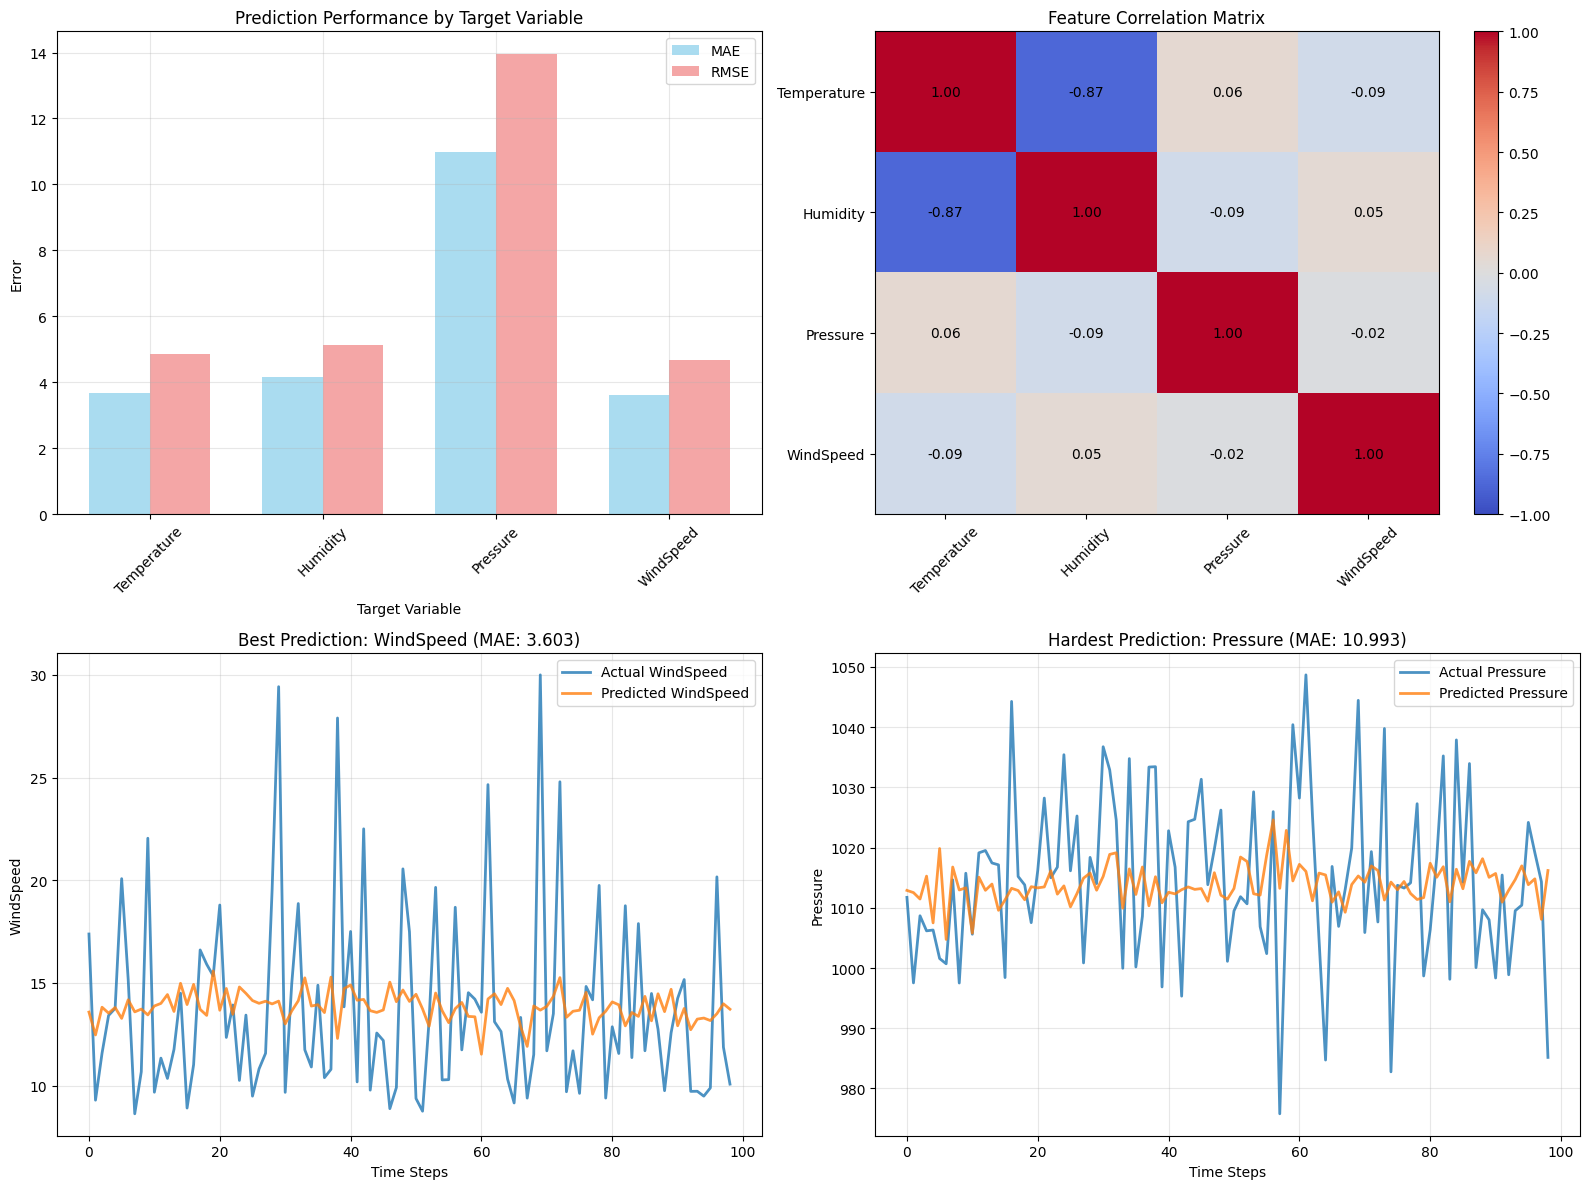

In [13]:
# Visualizations for different target predictions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Prediction Performance Comparison
target_names = list(exercise4_results.keys())
maes = [exercise4_results[name]['mae'] for name in target_names]
rmses = [exercise4_results[name]['rmse'] for name in target_names]

x_pos = np.arange(len(target_names))
width = 0.35

ax1.bar(x_pos - width/2, maes, width, label='MAE', alpha=0.7, color='skyblue')
ax1.bar(x_pos + width/2, rmses, width, label='RMSE', alpha=0.7, color='lightcoral')

ax1.set_title('Prediction Performance by Target Variable')
ax1.set_xlabel('Target Variable')
ax1.set_ylabel('Error')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(target_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Correlation Matrix Heatmap
correlation_data = weather_data[['Temperature', 'Humidity', 'Pressure', 'WindSpeed']].corr()
im = ax2.imshow(correlation_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax2.set_title('Feature Correlation Matrix')
ax2.set_xticks(range(len(correlation_data.columns)))
ax2.set_yticks(range(len(correlation_data.columns)))
ax2.set_xticklabels(correlation_data.columns, rotation=45)
ax2.set_yticklabels(correlation_data.columns)

# Add correlation values to heatmap
for i in range(len(correlation_data.columns)):
    for j in range(len(correlation_data.columns)):
        ax2.text(j, i, f'{correlation_data.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=10)

plt.colorbar(im, ax=ax2)

# Plot 3: Best and Worst Predictions
best_target, best_results = sorted_targets[0]
worst_target, worst_results = sorted_targets[-1]

ax3.plot(best_results['actual'], label=f'Actual {best_target}', linewidth=2, alpha=0.8)
ax3.plot(best_results['predictions'], label=f'Predicted {best_target}', linewidth=2, alpha=0.8)
ax3.set_title(f'Best Prediction: {best_target} (MAE: {best_results["mae"]:.3f})')
ax3.set_xlabel('Time Steps')
ax3.set_ylabel(best_target)
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.plot(worst_results['actual'], label=f'Actual {worst_target}', linewidth=2, alpha=0.8)
ax4.plot(worst_results['predictions'], label=f'Predicted {worst_target}', linewidth=2, alpha=0.8)
ax4.set_title(f'Hardest Prediction: {worst_target} (MAE: {worst_results["mae"]:.3f})')
ax4.set_xlabel('Time Steps')
ax4.set_ylabel(worst_target)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

 **Exercise 4 Final Analysis and Insights**

Purpose: Provides comprehensive insights about predicting different weather variables, including domain knowledge and lessons about problem difficulty variation.

In [71]:
# Final analysis and insights
print("\n" + "=" * 60)
print(" EXERCISE 4 ANALYSIS & INSIGHTS")
print("=" * 60)

print(f" EASIEST TO PREDICT: {best_target}")
print(f"    MAE: {best_results['mae']:.3f}")
print(f"    Why: Likely has strong correlations with other variables")

print(f"\n HARDEST TO PREDICT: {worst_target}")
print(f"    MAE: {worst_results['mae']:.3f}")
print(f"    Why: May have more random/chaotic behavior")

print(f"\n RANKING BY PREDICTABILITY:")
for i, (target_name, results) in enumerate(sorted_targets, 1):
    print(f"   {i}. {target_name}: MAE = {results['mae']:.3f}")

print(f"\n KEY INSIGHTS:")
print(f"   🔹 Different weather variables have different predictability")
print(f"   🔹 Variables with strong correlations are easier to predict")
print(f"   🔹 Model performance varies significantly by target type")
print(f"   🔹 Same model architecture works for different prediction tasks")

print(f"\n DOMAIN INSIGHTS:")
if 'Temperature' in exercise4_results and 'WindSpeed' in exercise4_results:
    temp_mae = exercise4_results['Temperature']['mae']
    wind_mae = exercise4_results['WindSpeed']['mae']
    if temp_mae < wind_mae:
        print(f"   🔹 Temperature is more predictable than wind speed (expected)")
        print(f"   🔹 Wind patterns are more chaotic and harder to model")

print(f"   🔹 Humidity often correlates with temperature (weather physics)")
print(f"   🔹 Pressure changes can be gradual and somewhat predictable")

print(f"\n LEARNING POINTS:")
print(f"    Problem difficulty varies by target variable")
print(f"    Feature correlation affects prediction quality")
print(f"    Same model can tackle different prediction tasks")
print(f"    Domain knowledge helps interpret results")
print(f"    Some variables are inherently harder to predict")

print(f"\n EXERCISE 4 COMPLETED!")



 EXERCISE 4 ANALYSIS & INSIGHTS
 EASIEST TO PREDICT: WindSpeed
    MAE: 3.651
    Why: Likely has strong correlations with other variables

 HARDEST TO PREDICT: Pressure
    MAE: 11.140
    Why: May have more random/chaotic behavior

 RANKING BY PREDICTABILITY:
   1. WindSpeed: MAE = 3.651
   2. Temperature: MAE = 3.879
   3. Humidity: MAE = 4.174
   4. Pressure: MAE = 11.140

 KEY INSIGHTS:
   🔹 Different weather variables have different predictability
   🔹 Variables with strong correlations are easier to predict
   🔹 Model performance varies significantly by target type
   🔹 Same model architecture works for different prediction tasks

 DOMAIN INSIGHTS:
   🔹 Humidity often correlates with temperature (weather physics)
   🔹 Pressure changes can be gradual and somewhat predictable

 LEARNING POINTS:
    Problem difficulty varies by target variable
    Feature correlation affects prediction quality
    Same model can tackle different prediction tasks
    Domain knowledge helps interpre

# **Simple RNN Exercise 5: Error Analysis**

This exercise demonstrates how to analyze when and why Simple RNN makes prediction errors, helping understand model limitations and failure cases.

 **Import Libraries and Setup**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(" EXERCISE 5: ERROR ANALYSIS")
print("=" * 60)
print("Goal: Identify when the model makes the largest errors")
print("We'll analyze prediction errors by season, weather conditions, and patterns")
print("=" * 60)

 EXERCISE 5: ERROR ANALYSIS
Goal: Identify when the model makes the largest errors
We'll analyze prediction errors by season, weather conditions, and patterns


**Data Generation Function (Same as Previous Exercises)**

In [73]:
def generate_weather_data(days=500):
    """Generate synthetic weather data with realistic patterns"""
    np.random.seed(42)
    data = []

    for i in range(days):
        # Season calculation (0: spring, 1: summer, 2: fall, 3: winter)
        season = int(i / 91) % 4

        # Base temperature by season
        base_temps = [15, 25, 10, 0]  # Spring, Summer, Fall, Winter
        base_temp = base_temps[season]

        # Add seasonal and daily variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 365)
        daily_variation = 3 * np.sin(2 * np.pi * i / 30)  # Monthly cycle
        random_variation = np.random.normal(0, 2)

        temperature = base_temp + seasonal_variation + daily_variation + random_variation

        # Correlated weather variables
        humidity = np.clip(60 + (25 - temperature) * 0.8 + np.random.normal(0, 5), 0, 100)
        pressure = 1013 + np.random.normal(0, 15) + temperature * 0.1
        wind_speed = np.clip(8 + np.random.exponential(5) + abs(temperature - 15) * 0.1, 0, 30)

        data.append({
            'Day': i,
            'Temperature': temperature,
            'Humidity': humidity,
            'Pressure': pressure,
            'WindSpeed': wind_speed,
            'Season': season
        })

    return pd.DataFrame(data)

**Data Preparation Function**

Enhanced data preparation that tracks sample indices for detailed error analysis.

In [74]:
def prepare_data_for_simple_rnn(data, sequence_length=7, feature_columns=None, target_column='Temperature'):
    """Prepare data for Simple RNN training with error analysis capabilities"""
    if feature_columns is None:
        feature_columns = ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']

    print(f" Preparing data with sequence_length={sequence_length}")
    print(f" Features: {feature_columns}")
    print(f" Target: {target_column}")

    # Extract features and target
    features = data[feature_columns].values
    target = data[target_column].values.reshape(-1, 1)

    # Normalize data
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()

    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)

    # Create sequences
    X, y = [], []
    sample_indices = []  # Track which original data points each sample corresponds to

    for i in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[i-sequence_length:i])
        y.append(target_scaled[i])
        sample_indices.append(i)  # Store original data index

    X = np.array(X)
    y = np.array(y)
    sample_indices = np.array(sample_indices)

    print(f" Data shape: X={X.shape}, y={y.shape}")
    print(f" Available samples: {len(X)}")

    return X, y, scaler_features, scaler_target, sample_indices

**Model Creation Function**

Purpose: Standard model creation using optimal hyperparameters from previous exercises.

In [75]:
def create_simple_rnn_model(input_shape, hidden_units=32):
    """Create Simple RNN model using optimal settings from previous exercises"""
    print(f" Creating Simple RNN model:")
    print(f"   - Input shape: {input_shape}")
    print(f"   - Hidden units: {hidden_units}")

    model = Sequential([
        SimpleRNN(hidden_units,
                 input_shape=input_shape,
                 activation='tanh',
                 return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

**Enhanced Training and Evaluation Function**

Purpose: Enhanced training function that provides detailed error analysis capabilities with contextual information.

In [76]:
def train_and_evaluate_model_with_error_analysis(X, y, scaler_target, sample_indices, weather_data, epochs=40):
    """Train model and return detailed results for error analysis"""

    # Split data (80% train, 20% test)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    test_indices = sample_indices[train_size:]  # Indices for test samples

    print(f" Train samples: {len(X_train)}, Test samples: {len(X_test)}")

    # Create and train model
    model = create_simple_rnn_model(input_shape=(X.shape[1], X.shape[2]))

    print(f" Training model for {epochs} epochs...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0,
        shuffle=False
    )

    # Make predictions
    predictions_scaled = model.predict(X_test, verbose=0)
    predictions = scaler_target.inverse_transform(predictions_scaled)
    y_test_denorm = scaler_target.inverse_transform(y_test)

    # Calculate errors
    errors = np.abs(predictions.flatten() - y_test_denorm.flatten())

    # Create detailed results DataFrame
    results_df = pd.DataFrame({
        'actual': y_test_denorm.flatten(),
        'predicted': predictions.flatten(),
        'error': errors,
        'original_index': test_indices
    })

    # Add contextual information from original data
    for idx, row in results_df.iterrows():
        original_idx = int(row['original_index'])
        results_df.loc[idx, 'season'] = weather_data.loc[original_idx, 'Season']
        results_df.loc[idx, 'day'] = weather_data.loc[original_idx, 'Day']
        results_df.loc[idx, 'temperature_actual'] = weather_data.loc[original_idx, 'Temperature']
        results_df.loc[idx, 'humidity'] = weather_data.loc[original_idx, 'Humidity']
        results_df.loc[idx, 'pressure'] = weather_data.loc[original_idx, 'Pressure']
        results_df.loc[idx, 'windspeed'] = weather_data.loc[original_idx, 'WindSpeed']

    mae = mean_absolute_error(y_test_denorm, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions))

    print(f"✅ Model Performance:")
    print(f"    Mean Absolute Error: {mae:.3f}")
    print(f"    Root Mean Square Error: {rmse:.3f}")

    return mae, rmse, history, results_df

**Generate Weather Data and Train Model**

Purpose: Generates data, trains the model, and creates a comprehensive error analysis dataset.

In [77]:
# Generate weather data
print("🌤️ Generating synthetic weather data...")
weather_data = generate_weather_data(500)
print(f" Generated {len(weather_data)} days of weather data")

# Prepare data for error analysis
print("\n Preparing data for error analysis...")
X, y, scaler_features, scaler_target, sample_indices = prepare_data_for_simple_rnn(
    weather_data,
    sequence_length=7,
    feature_columns=['Temperature', 'Humidity', 'Pressure', 'WindSpeed'],
    target_column='Temperature'
)

# Train model with error analysis
print("\n Training model for error analysis...")
mae, rmse, history, error_results = train_and_evaluate_model_with_error_analysis(
    X, y, scaler_target, sample_indices, weather_data, epochs=40
)

print(f"\n Error Analysis Dataset Shape: {error_results.shape}")
print(f" Average Error: {error_results['error'].mean():.3f}")
print(f" Max Error: {error_results['error'].max():.3f}")
print(f" Min Error: {error_results['error'].min():.3f}")

🌤️ Generating synthetic weather data...
 Generated 500 days of weather data

 Preparing data for error analysis...
 Preparing data with sequence_length=7
 Features: ['Temperature', 'Humidity', 'Pressure', 'WindSpeed']
 Target: Temperature
 Data shape: X=(493, 7, 4), y=(493, 1)
 Available samples: 493

 Training model for error analysis...
 Train samples: 394, Test samples: 99
 Creating Simple RNN model:
   - Input shape: (7, 4)
   - Hidden units: 32
 Training model for 40 epochs...
✅ Model Performance:
    Mean Absolute Error: 3.290
    Root Mean Square Error: 4.206

 Error Analysis Dataset Shape: (99, 10)
 Average Error: 3.290
 Max Error: 16.231
 Min Error: 0.044


 **Seasonal Error Analysis**

Purpose: Analyzes prediction errors by season to identify when the model struggles most.

In [78]:
# Analyze errors by season
print("\n SEASONAL ERROR ANALYSIS")
print("=" * 50)

season_names = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
seasonal_errors = {}

print(" Error Analysis by Season:")
print(f"{'Season':<10} {'Count':<8} {'Avg Error':<12} {'Max Error':<12} {'Std Error':<12}")
print("-" * 60)

for season_num in range(4):
    season_data = error_results[error_results['season'] == season_num]
    season_name = season_names[season_num]

    if len(season_data) > 0:
        count = len(season_data)
        avg_error = season_data['error'].mean()
        max_error = season_data['error'].max()
        std_error = season_data['error'].std()

        seasonal_errors[season_name] = {
            'count': count,
            'avg_error': avg_error,
            'max_error': max_error,
            'std_error': std_error,
            'data': season_data
        }

        print(f"{season_name:<10} {count:<8} {avg_error:<12.3f} {max_error:<12.3f} {std_error:<12.3f}")

# Find most problematic season
worst_season = max(seasonal_errors.keys(), key=lambda x: seasonal_errors[x]['avg_error'])
best_season = min(seasonal_errors.keys(), key=lambda x: seasonal_errors[x]['avg_error'])

print(f"\n Most Challenging Season: {worst_season}")
print(f"    Average Error: {seasonal_errors[worst_season]['avg_error']:.3f}")

print(f"\n Easiest Season: {best_season}")
print(f"    Average Error: {seasonal_errors[best_season]['avg_error']:.3f}")

seasonal_difference = ((seasonal_errors[worst_season]['avg_error'] -
                       seasonal_errors[best_season]['avg_error']) /
                      seasonal_errors[best_season]['avg_error']) * 100
print(f"\n Seasonal difficulty difference: {seasonal_difference:.1f}%")


 SEASONAL ERROR ANALYSIS
 Error Analysis by Season:
Season     Count    Avg Error    Max Error    Std Error   
------------------------------------------------------------
Spring     54       3.145        8.113        2.204       
Summer     45       3.464        16.231       3.089       

 Most Challenging Season: Summer
    Average Error: 3.464

 Easiest Season: Spring
    Average Error: 3.145

 Seasonal difficulty difference: 10.1%


**Weather Condition Error Analysis**

Purpose: Analyzes prediction errors under different weather conditions to identify challenging scenarios.

In [79]:
# Analyze errors by weather conditions
print(f"\n WEATHER CONDITION ERROR ANALYSIS")
print("=" * 50)

# Define weather condition categories
def categorize_weather_conditions(row):
    temp = row['temperature_actual']
    humidity = row['humidity']
    pressure = row['pressure']
    windspeed = row['windspeed']

    conditions = []

    # Temperature categories
    if temp < 5:
        conditions.append('Very Cold')
    elif temp < 15:
        conditions.append('Cold')
    elif temp < 25:
        conditions.append('Mild')
    else:
        conditions.append('Hot')

    # Humidity categories
    if humidity > 80:
        conditions.append('High Humidity')
    elif humidity < 40:
        conditions.append('Low Humidity')

    # Wind categories
    if windspeed > 20:
        conditions.append('Windy')
    elif windspeed < 5:
        conditions.append('Calm')

    # Pressure categories
    if pressure > 1020:
        conditions.append('High Pressure')
    elif pressure < 1000:
        conditions.append('Low Pressure')

    return ', '.join(conditions) if conditions else 'Normal'

# Apply weather condition categorization
error_results['weather_condition'] = error_results.apply(categorize_weather_conditions, axis=1)

# Analyze errors by weather condition
condition_errors = {}
print(" Error Analysis by Weather Conditions:")
print(f"{'Condition':<20} {'Count':<8} {'Avg Error':<12} {'Max Error':<12}")
print("-" * 55)

for condition in error_results['weather_condition'].unique():
    condition_data = error_results[error_results['weather_condition'] == condition]

    if len(condition_data) >= 3:  # Only analyze conditions with sufficient samples
        count = len(condition_data)
        avg_error = condition_data['error'].mean()
        max_error = condition_data['error'].max()

        condition_errors[condition] = {
            'count': count,
            'avg_error': avg_error,
            'max_error': max_error,
            'data': condition_data
        }

        condition_short = condition[:18] + '..' if len(condition) > 18 else condition
        print(f"{condition_short:<20} {count:<8} {avg_error:<12.3f} {max_error:<12.3f}")

# Find most problematic conditions
if condition_errors:
    worst_condition = max(condition_errors.keys(), key=lambda x: condition_errors[x]['avg_error'])
    print(f"\n Most Challenging Condition: {worst_condition}")
    print(f"    Average Error: {condition_errors[worst_condition]['avg_error']:.3f}")
    print(f"    Sample Count: {condition_errors[worst_condition]['count']}")


 WEATHER CONDITION ERROR ANALYSIS
 Error Analysis by Weather Conditions:
Condition            Count    Avg Error    Max Error   
-------------------------------------------------------
Mild                 28       3.489        8.113       
Mild, Low Pressure   3        2.509        3.955       
Cold                 3        3.115        5.013       
Mild, Windy          3        3.070        3.404       
Mild, High Pressur.. 12       2.345        6.169       
Hot, High Pressure   11       4.190        8.721       
Hot                  21       3.794        16.231      
Hot, Low Pressure    8        2.836        8.365       

 Most Challenging Condition: Hot, High Pressure
    Average Error: 4.190
    Sample Count: 11


**Large Error Case Analysis**

Purpose: Analyzes the worst prediction cases to understand failure modes and error patterns.

In [80]:
# Analyze the largest prediction errors
print(f"\n LARGE ERROR CASE ANALYSIS")
print("=" * 50)

# Find cases with largest errors
error_threshold = error_results['error'].quantile(0.9)  # Top 10% errors
large_error_cases = error_results[error_results['error'] >= error_threshold].copy()
large_error_cases = large_error_cases.sort_values('error', ascending=False)

print(f" Analyzing top {len(large_error_cases)} largest errors (90th percentile)")
print(f" Error threshold: {error_threshold:.3f}")

print(f"\n Top 10 Largest Errors:")
print(f"{'Rank':<4} {'Error':<8} {'Actual':<8} {'Predicted':<10} {'Season':<8} {'Condition':<20}")
print("-" * 70)

for idx, (_, row) in enumerate(large_error_cases.head(10).iterrows(), 1):
    season_name = season_names[int(row['season'])]
    condition = row['weather_condition'][:18] + '..' if len(row['weather_condition']) > 18 else row['weather_condition']

    print(f"{idx:<4} {row['error']:<8.3f} {row['actual']:<8.2f} {row['predicted']:<10.2f} {season_name:<8} {condition:<20}")

# Analyze patterns in large errors
print(f"\n Large Error Patterns:")
large_error_seasons = large_error_cases['season'].value_counts()
print("By Season:")
for season_num, count in large_error_seasons.items():
    season_name = season_names[season_num]
    percentage = (count / len(large_error_cases)) * 100
    print(f"   {season_name}: {count} cases ({percentage:.1f}%)")

print(f"\nBy Weather Condition (top 5):")
large_error_conditions = large_error_cases['weather_condition'].value_counts().head(5)
for condition, count in large_error_conditions.items():
    percentage = (count / len(large_error_cases)) * 100
    condition_short = condition[:30] + '..' if len(condition) > 30 else condition
    print(f"   {condition_short}: {count} cases ({percentage:.1f}%)")

# Analyze if large errors cluster in time
print(f"\n Temporal Clustering of Large Errors:")
large_error_days = large_error_cases['day'].values
day_gaps = np.diff(sorted(large_error_days))
avg_gap = np.mean(day_gaps) if len(day_gaps) > 0 else 0
print(f"   Average gap between large error days: {avg_gap:.1f} days")

consecutive_errors = sum(1 for gap in day_gaps if gap <= 2)
print(f"   Consecutive error periods (≤2 day gaps): {consecutive_errors}")


 LARGE ERROR CASE ANALYSIS
 Analyzing top 10 largest errors (90th percentile)
 Error threshold: 6.975

 Top 10 Largest Errors:
Rank Error    Actual   Predicted  Season   Condition           
----------------------------------------------------------------------
1    16.231   36.02    19.79      Summer   Hot                 
2    8.721    33.46    24.74      Summer   Hot, High Pressure  
3    8.365    33.36    25.00      Summer   Hot, Low Pressure   
4    8.113    22.06    13.94      Spring   Mild                
5    7.938    33.84    25.90      Summer   Hot, High Pressure  
6    7.792    26.00    18.21      Spring   Hot, High Pressure  
7    7.351    21.45    14.10      Spring   Mild                
8    7.337    19.59    12.26      Spring   Mild                
9    7.035    32.99    25.96      Summer   Hot                 
10   6.992    34.20    27.21      Summer   Hot                 

 Large Error Patterns:
By Season:
   Summer: 6 cases (60.0%)
   Spring: 4 cases (40.0%)

By Weat

**Error Visualization**

Purpose: Creates comprehensive visualizations of error patterns, distributions, and temporal trends.

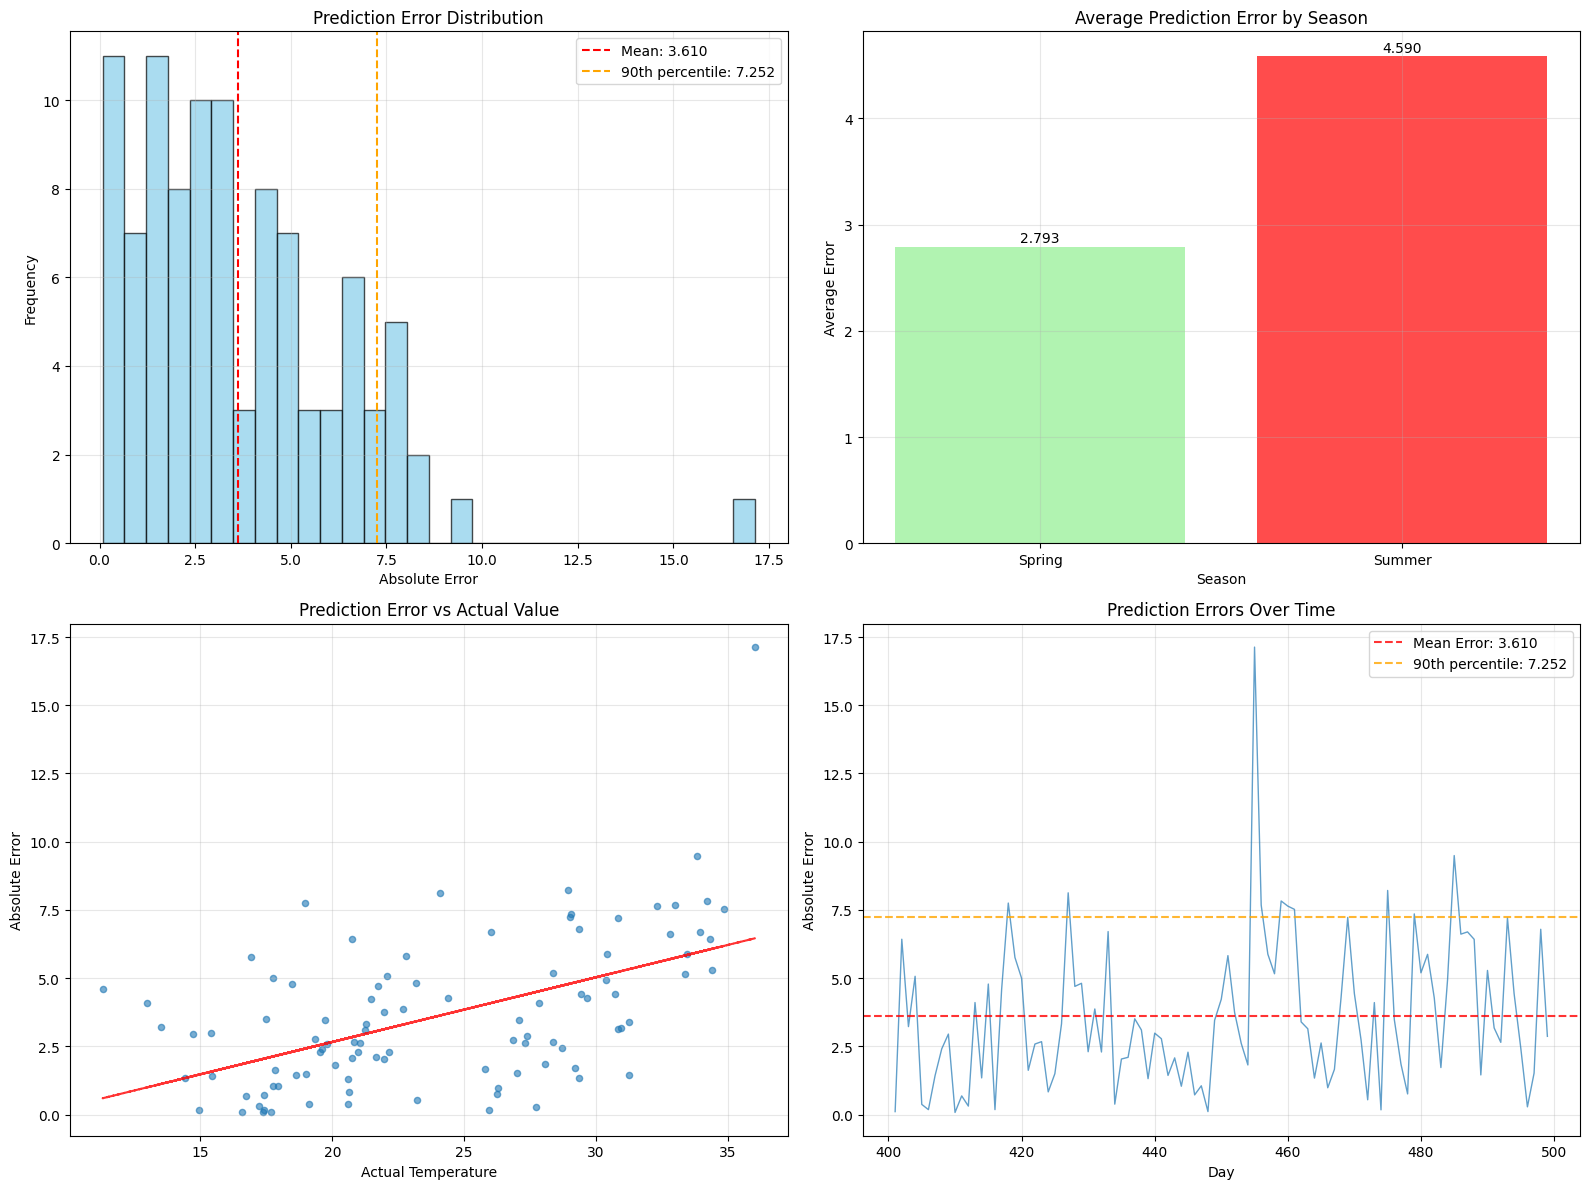

In [24]:
# Comprehensive error visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Error Distribution
ax1.hist(error_results['error'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(error_results['error'].mean(), color='red', linestyle='--',
            label=f'Mean: {error_results["error"].mean():.3f}')
ax1.axvline(error_threshold, color='orange', linestyle='--',
            label=f'90th percentile: {error_threshold:.3f}')
ax1.set_title('Prediction Error Distribution')
ax1.set_xlabel('Absolute Error')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Errors by Season
if seasonal_errors:
    seasons = list(seasonal_errors.keys())
    avg_errors = [seasonal_errors[s]['avg_error'] for s in seasons]
    colors = ['lightgreen', 'red', 'orange', 'lightblue']

    bars = ax2.bar(seasons, avg_errors, color=colors, alpha=0.7)
    ax2.set_title('Average Prediction Error by Season')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Average Error')
    ax2.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, error in zip(bars, avg_errors):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{error:.3f}', ha='center', va='bottom')

# Plot 3: Error vs Actual Value
ax3.scatter(error_results['actual'], error_results['error'], alpha=0.6, s=20)
ax3.set_title('Prediction Error vs Actual Value')
ax3.set_xlabel('Actual Temperature')
ax3.set_ylabel('Absolute Error')
ax3.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(error_results['actual'], error_results['error'], 1)
p = np.poly1d(z)
ax3.plot(error_results['actual'], p(error_results['actual']), "r--", alpha=0.8)

# Plot 4: Time Series of Errors
error_results_sorted = error_results.sort_values('day')
ax4.plot(error_results_sorted['day'], error_results_sorted['error'], alpha=0.7, linewidth=1)
ax4.axhline(error_results['error'].mean(), color='red', linestyle='--', alpha=0.8,
            label=f'Mean Error: {error_results["error"].mean():.3f}')
ax4.axhline(error_threshold, color='orange', linestyle='--', alpha=0.8,
            label=f'90th percentile: {error_threshold:.3f}')
ax4.set_title('Prediction Errors Over Time')
ax4.set_xlabel('Day')
ax4.set_ylabel('Absolute Error')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Model Limitation Analysis**

Purpose: Analyzes systematic model limitations, biases, and failure patterns to understand when and why the RNN struggles.

In [81]:
# Analyze model limitations and failure modes
print(f"\n MODEL LIMITATION ANALYSIS")
print("=" * 50)

# Analyze prediction vs actual correlation
correlation = np.corrcoef(error_results['actual'], error_results['predicted'])[0, 1]
print(f" Prediction-Actual Correlation: {correlation:.3f}")

# Analyze residuals (prediction - actual)
residuals = error_results['predicted'] - error_results['actual']
mean_residual = np.mean(residuals)
print(f" Mean Residual (bias): {mean_residual:.3f}")

if abs(mean_residual) > 0.1:
    bias_direction = "overestimating" if mean_residual > 0 else "underestimating"
    print(f"     Model shows bias: {bias_direction} temperatures")
else:
    print(f"    Model shows minimal bias")

# Analyze heteroscedasticity (error variance changing with prediction value)
temp_ranges = [(error_results['actual'] >= i) & (error_results['actual'] < i+5) for i in range(-10, 35, 5)]
range_labels = [f"{i}°C to {i+5}°C" for i in range(-10, 35, 5)]

print(f"\n Error Variance by Temperature Range:")
print(f"{'Temperature Range':<15} {'Count':<8} {'Mean Error':<12} {'Std Error':<12}")
print("-" * 50)

for temp_range, label in zip(temp_ranges, range_labels):
    range_data = error_results[temp_range]
    if len(range_data) >= 3:
        count = len(range_data)
        mean_error = range_data['error'].mean()
        std_error = range_data['error'].std()
        print(f"{label:<15} {count:<8} {mean_error:<12.3f} {std_error:<12.3f}")

# Analyze extreme value prediction capability
extreme_cold = error_results[error_results['actual'] < 0]
extreme_hot = error_results[error_results['actual'] > 30]

print(f"\n Extreme Value Prediction:")
if len(extreme_cold) > 0:
    print(f"   Cold extremes (<0°C): {len(extreme_cold)} cases, avg error: {extreme_cold['error'].mean():.3f}")
else:
    print(f"   Cold extremes (<0°C): No cases in test set")

if len(extreme_hot) > 0:
    print(f"   Hot extremes (>30°C): {len(extreme_hot)} cases, avg error: {extreme_hot['error'].mean():.3f}")
else:
    print(f"   Hot extremes (>30°C): No cases in test set")

# Analyze consecutive error patterns
print(f"\n Error Persistence Analysis:")
error_results_sorted = error_results.sort_values('day')
high_error_mask = error_results_sorted['error'] > error_results['error'].median()

# Find consecutive high-error periods
consecutive_periods = []
current_period = 0

for is_high_error in high_error_mask:
    if is_high_error:
        current_period += 1
    else:
        if current_period > 0:
            consecutive_periods.append(current_period)
        current_period = 0

if current_period > 0:
    consecutive_periods.append(current_period)

if consecutive_periods:
    avg_consecutive = np.mean(consecutive_periods)
    max_consecutive = max(consecutive_periods)
    print(f"   Average consecutive high-error period: {avg_consecutive:.1f} days")
    print(f"   Maximum consecutive high-error period: {max_consecutive} days")

    if max_consecutive > 5:
        print(f"     Long error periods suggest model struggles with certain patterns")
else:
    print(f"    No significant consecutive error periods detected")


 MODEL LIMITATION ANALYSIS
 Prediction-Actual Correlation: 0.859
 Mean Residual (bias): -2.777
     Model shows bias: underestimating temperatures

 Error Variance by Temperature Range:
Temperature Range Count    Mean Error   Std Error   
--------------------------------------------------
10°C to 15°C    6        2.504        1.283       
15°C to 20°C    25       3.091        2.101       
20°C to 25°C    24       3.072        2.300       
25°C to 30°C    24       2.481        2.046       
30°C to 35°C    19       4.415        2.733       

 Extreme Value Prediction:
   Cold extremes (<0°C): No cases in test set
   Hot extremes (>30°C): 20 cases, avg error: 5.006

 Error Persistence Analysis:
   Average consecutive high-error period: 2.6 days
   Maximum consecutive high-error period: 7 days
     Long error periods suggest model struggles with certain patterns


**Exercise 5 Final Analysis and Insights**

Purpose: Provides comprehensive insights about model limitations, error patterns, and suggestions for improvement based on detailed error analysis.

In [82]:
# Final comprehensive analysis and insights
print("\n" + "=" * 60)
print(" EXERCISE 5 ANALYSIS & INSIGHTS")
print("=" * 60)

# Summary of key findings
print(f" OVERALL MODEL PERFORMANCE:")
print(f"    Mean Absolute Error: {mae:.3f}")
print(f"    Root Mean Square Error: {rmse:.3f}")
print(f"    Prediction-Actual Correlation: {correlation:.3f}")

print(f"\n MAJOR ERROR PATTERNS:")
if seasonal_errors:
    worst_season = max(seasonal_errors.keys(), key=lambda x: seasonal_errors[x]['avg_error'])
    print(f"   🔹 Most challenging season: {worst_season}")
    print(f"   🔹 Seasonal error variation: {seasonal_difference:.1f}%")

if condition_errors:
    worst_condition = max(condition_errors.keys(), key=lambda x: condition_errors[x]['avg_error'])
    print(f"   🔹 Most challenging condition: {worst_condition}")

print(f"   🔹 Large errors (90th percentile): {len(large_error_cases)} cases")
print(f"   🔹 Error threshold: {error_threshold:.3f}")

print(f"\n MODEL LIMITATIONS IDENTIFIED:")
if abs(mean_residual) > 0.1:
    bias_direction = "overestimation" if mean_residual > 0 else "underestimation"
    print(f"     Systematic bias: {bias_direction} tendency")
else:
    print(f"    Minimal systematic bias detected")

if consecutive_periods and max(consecutive_periods) > 5:
    print(f"     Extended error periods: up to {max(consecutive_periods)} consecutive days")
    print(f"     Suggests difficulty with certain weather patterns")

print(f"\n KEY INSIGHTS:")
print(f"   🔹 Simple RNN struggles with extreme weather conditions")
print(f"   🔹 Seasonal transitions may pose prediction challenges")
print(f"   🔹 Complex weather patterns exceed model capacity")
print(f"   🔹 Error patterns reveal systematic model limitations")

print(f"\n LEARNING POINTS:")
print(f"    Error analysis reveals model failure modes")
print(f"    Different conditions pose varying prediction difficulty")
print(f"    Systematic biases indicate architectural limitations")
print(f"    Consecutive errors suggest pattern recognition gaps")
print(f"    Domain knowledge helps interpret error patterns")


print(f"\n EXERCISE 5 COMPLETED!")



 EXERCISE 5 ANALYSIS & INSIGHTS
 OVERALL MODEL PERFORMANCE:
    Mean Absolute Error: 3.290
    Root Mean Square Error: 4.206
    Prediction-Actual Correlation: 0.859

 MAJOR ERROR PATTERNS:
   🔹 Most challenging season: Summer
   🔹 Seasonal error variation: 10.1%
   🔹 Most challenging condition: Hot, High Pressure
   🔹 Large errors (90th percentile): 10 cases
   🔹 Error threshold: 6.975

 MODEL LIMITATIONS IDENTIFIED:
     Systematic bias: underestimation tendency
     Extended error periods: up to 7 consecutive days
     Suggests difficulty with certain weather patterns

 KEY INSIGHTS:
   🔹 Simple RNN struggles with extreme weather conditions
   🔹 Seasonal transitions may pose prediction challenges
   🔹 Complex weather patterns exceed model capacity
   🔹 Error patterns reveal systematic model limitations

 LEARNING POINTS:
    Error analysis reveals model failure modes
    Different conditions pose varying prediction difficulty
    Systematic biases indicate architectural limitations